# Trabajo Práctico Integrador
---

Josselyn Ordoñez - Tatiana Arenas - Jorge Valdez

# 1.- Dataset seleccionado.

*  Datos de distintas canciones en Spotify.

# 2.- Análisis exploratorio de datos (EDA)

* Visualizar las primeras filas. 
* Realizar un resumen de 5 números. 
* Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si 
es informativa para un problema de clasificación (por ejemplo si se trata de un código, como 
una matrícula, o un nombre propio). 
* Identificar las variables de entrada y de salida del problema. 
* Variables de entrada: 
    - Realizar los siguientes análisis por tipo de variable: 
        - Numéricas: Obtener conclusiones acerca de la distribución de los datos. 
        - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada 
categoría, etc. 
        - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver? 
* Variables de salida (en caso de aplicar): 
    - ¿Están balanceadas las clases? 
    - (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

Info:

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

## Cargamos librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
DATASET_PATH = "data/"
# Cargamos el dataset
df = pd.read_csv(DATASET_PATH+'data_playlist.csv')

Visualizamos los primeros datos

In [4]:
# Visualizamos las primeras 5 filas
df.head()

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.713         0.514    100125   0.521          0.816000    8   
1         0.192         0.714    207019   0.614          0.000000    4   
2         0.333         0.630    216200   0.455          0.000004    5   
3         0.601         0.810    136413   0.221          0.210000    5   
4         0.883         0.465    181440   0.459          0.000173    6   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1120   -14.835     0       0.0444  119.879               4    0.143   
1    0.2630    -6.935     1       0.0319  123.969               4    0.582   
2    0.1270    -9.290     1       0.0292  139.931               4    0.199   
3    0.1840   -11.005     1       0.0429  109.960               4    0.798   
4    0.0692    -8.137     0       0.0351   90.807               4    0.288   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

## Descripción del dataset
---

1. **acousticness**: Una medida que representa la cantidad de sonido acústico en una canción. Los valores varían de 0.0 a 1.0.

2. **danceability**: Una medida que describe cuánto se presta una canción para bailar, basada en varios factores musicales. Los valores varían de 0.0 a 1.0.

3. **duration**: La duración de la canción en milisegundos.

4. **energy**: Una medida que representa la intensidad y actividad de una canción. Los valores varían de 0.0 a 1.0.

5. **instrumentalness**: Como mencioné anteriormente, es una medida que predice si una pista es instrumental o no. Los valores varían de 0.0 a 1.0.

6. **key**: La clave tonal predominante de la canción, representada como un valor entero entre 0 y 11 (donde cada número corresponde a una clave musical).

7. **liveness**: Una medida que representa la presencia de una audiencia en la grabación de la canción. Los valores varían de 0.0 a 1.0.

8. **loudness**: El volumen general de la canción en decibelios (dB).

9. **mode**: Indica la modalidad de la canción (mayor o menor), representada como un valor binario (1 = Mayor, 0 = Menor).

10. **speechiness**: Una medida que representa la presencia de palabras habladas en una canción. Los valores varían de 0.0 a 1.0.

11. **tempo**: El tempo general de la canción en latidos por minuto (BPM).

12. **time_signature**: Una indicación general del número de beats en cada barra o compás de la canción.

13. **valence**: Una medida que representa la positividad transmitida por una canción. Los valores varían de 0.0 a 1.0.

14. **label**: indica si la canción le gusta o no a un usuario. 0 = no le gusta, 1 = si le gusta



In [5]:
# Mostramos la información del dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


Podemos ver que todas las columnas son leidas como tipo númerico. Luego veremos cuales son categóricas.

In [6]:
# Veo los valores únicos de la columna "key"
print("Valores únicos de columna 'key'",np.sort(df['key'].unique()))
# Veo los valores únicos de la columna "mode"
print("Valores únicos de columna 'mode'",np.sort(df['mode'].unique()))
# Veo los valores únicos de la columna "time_signature"
print("Valores únicos de columna 'time_signature'",np.sort(df['time_signature'].unique()))


Valores únicos de columna 'key' [ 0  1  2  3  4  5  6  7  8  9 10 11]
Valores únicos de columna 'mode' [0 1]
Valores únicos de columna 'time_signature' [1 3 4 5]


Podemos argumentar que esta tres columnas son categoricas: 'key', 'mode' y 'time_signature'.

In [7]:
# Supuestos de variables independientes
NUMERICAL_FEATURES = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
CATEGORICAL_FEATURES = ['key', 'mode', 'time_signature']

# Variable objetivo
TARGET = 'label'

## Estadísticas descriptivas de variables númericas

In [8]:
# Mostramos un resumen estadístico de las columnas numéricas
df[NUMERICAL_FEATURES].describe().T

count           mean           std           min  \
acousticness      750.0       0.357394      0.338405      0.000001   
danceability      750.0       0.596439      0.172036      0.107000   
duration          750.0  220112.733333  65587.690483  33840.000000   
energy            750.0       0.594188      0.253301      0.009250   
instrumentalness  750.0       0.100245      0.259921      0.000000   
liveness          750.0       0.203376      0.177609      0.024000   
loudness          750.0      -8.509339      5.039488    -29.601000   
speechiness       750.0       0.098966      0.104715      0.023400   
tempo             750.0     120.405761     28.378116     55.747000   
valence           750.0       0.497321      0.239615      0.033200   

                           25%           50%            75%         max  
acousticness           0.03715       0.24450       0.678500       0.994  
danceability           0.48000       0.60600       0.715750       0.986  
duration          185490.25000  215108.50000  244236.750000  675360.000  
energy                 0.42325       0.63150       0.804750       0.995  
instrumentalness       0.00000       0.00001       0.002245       0.967  
liveness               0.09455       0.12900       0.264750       0.979  
loudness             -10.17350      -7.27000      -5.097750      -0.533  
speechiness            0.03590       0.04875       0.113000       0.721  
tempo                 98.99800     120.10450     138.074750     204.162  
valence                0.29700       0.48300       0.684500       0.975

## Estadísticas descriptivas de variables categóricas

In [9]:
# Mostramos un resumen estadístico de las columnas categóricas
df[CATEGORICAL_FEATURES].describe().T 

count      mean       std  min  25%  50%  75%   max
key             750.0  4.829333  3.636001  0.0  1.0  5.0  8.0  11.0
mode            750.0  0.741333  0.438194  0.0  0.0  1.0  1.0   1.0
time_signature  750.0  3.902667  0.400091  1.0  4.0  4.0  4.0   5.0

### Graficamos la dispersion de los datos de a pares

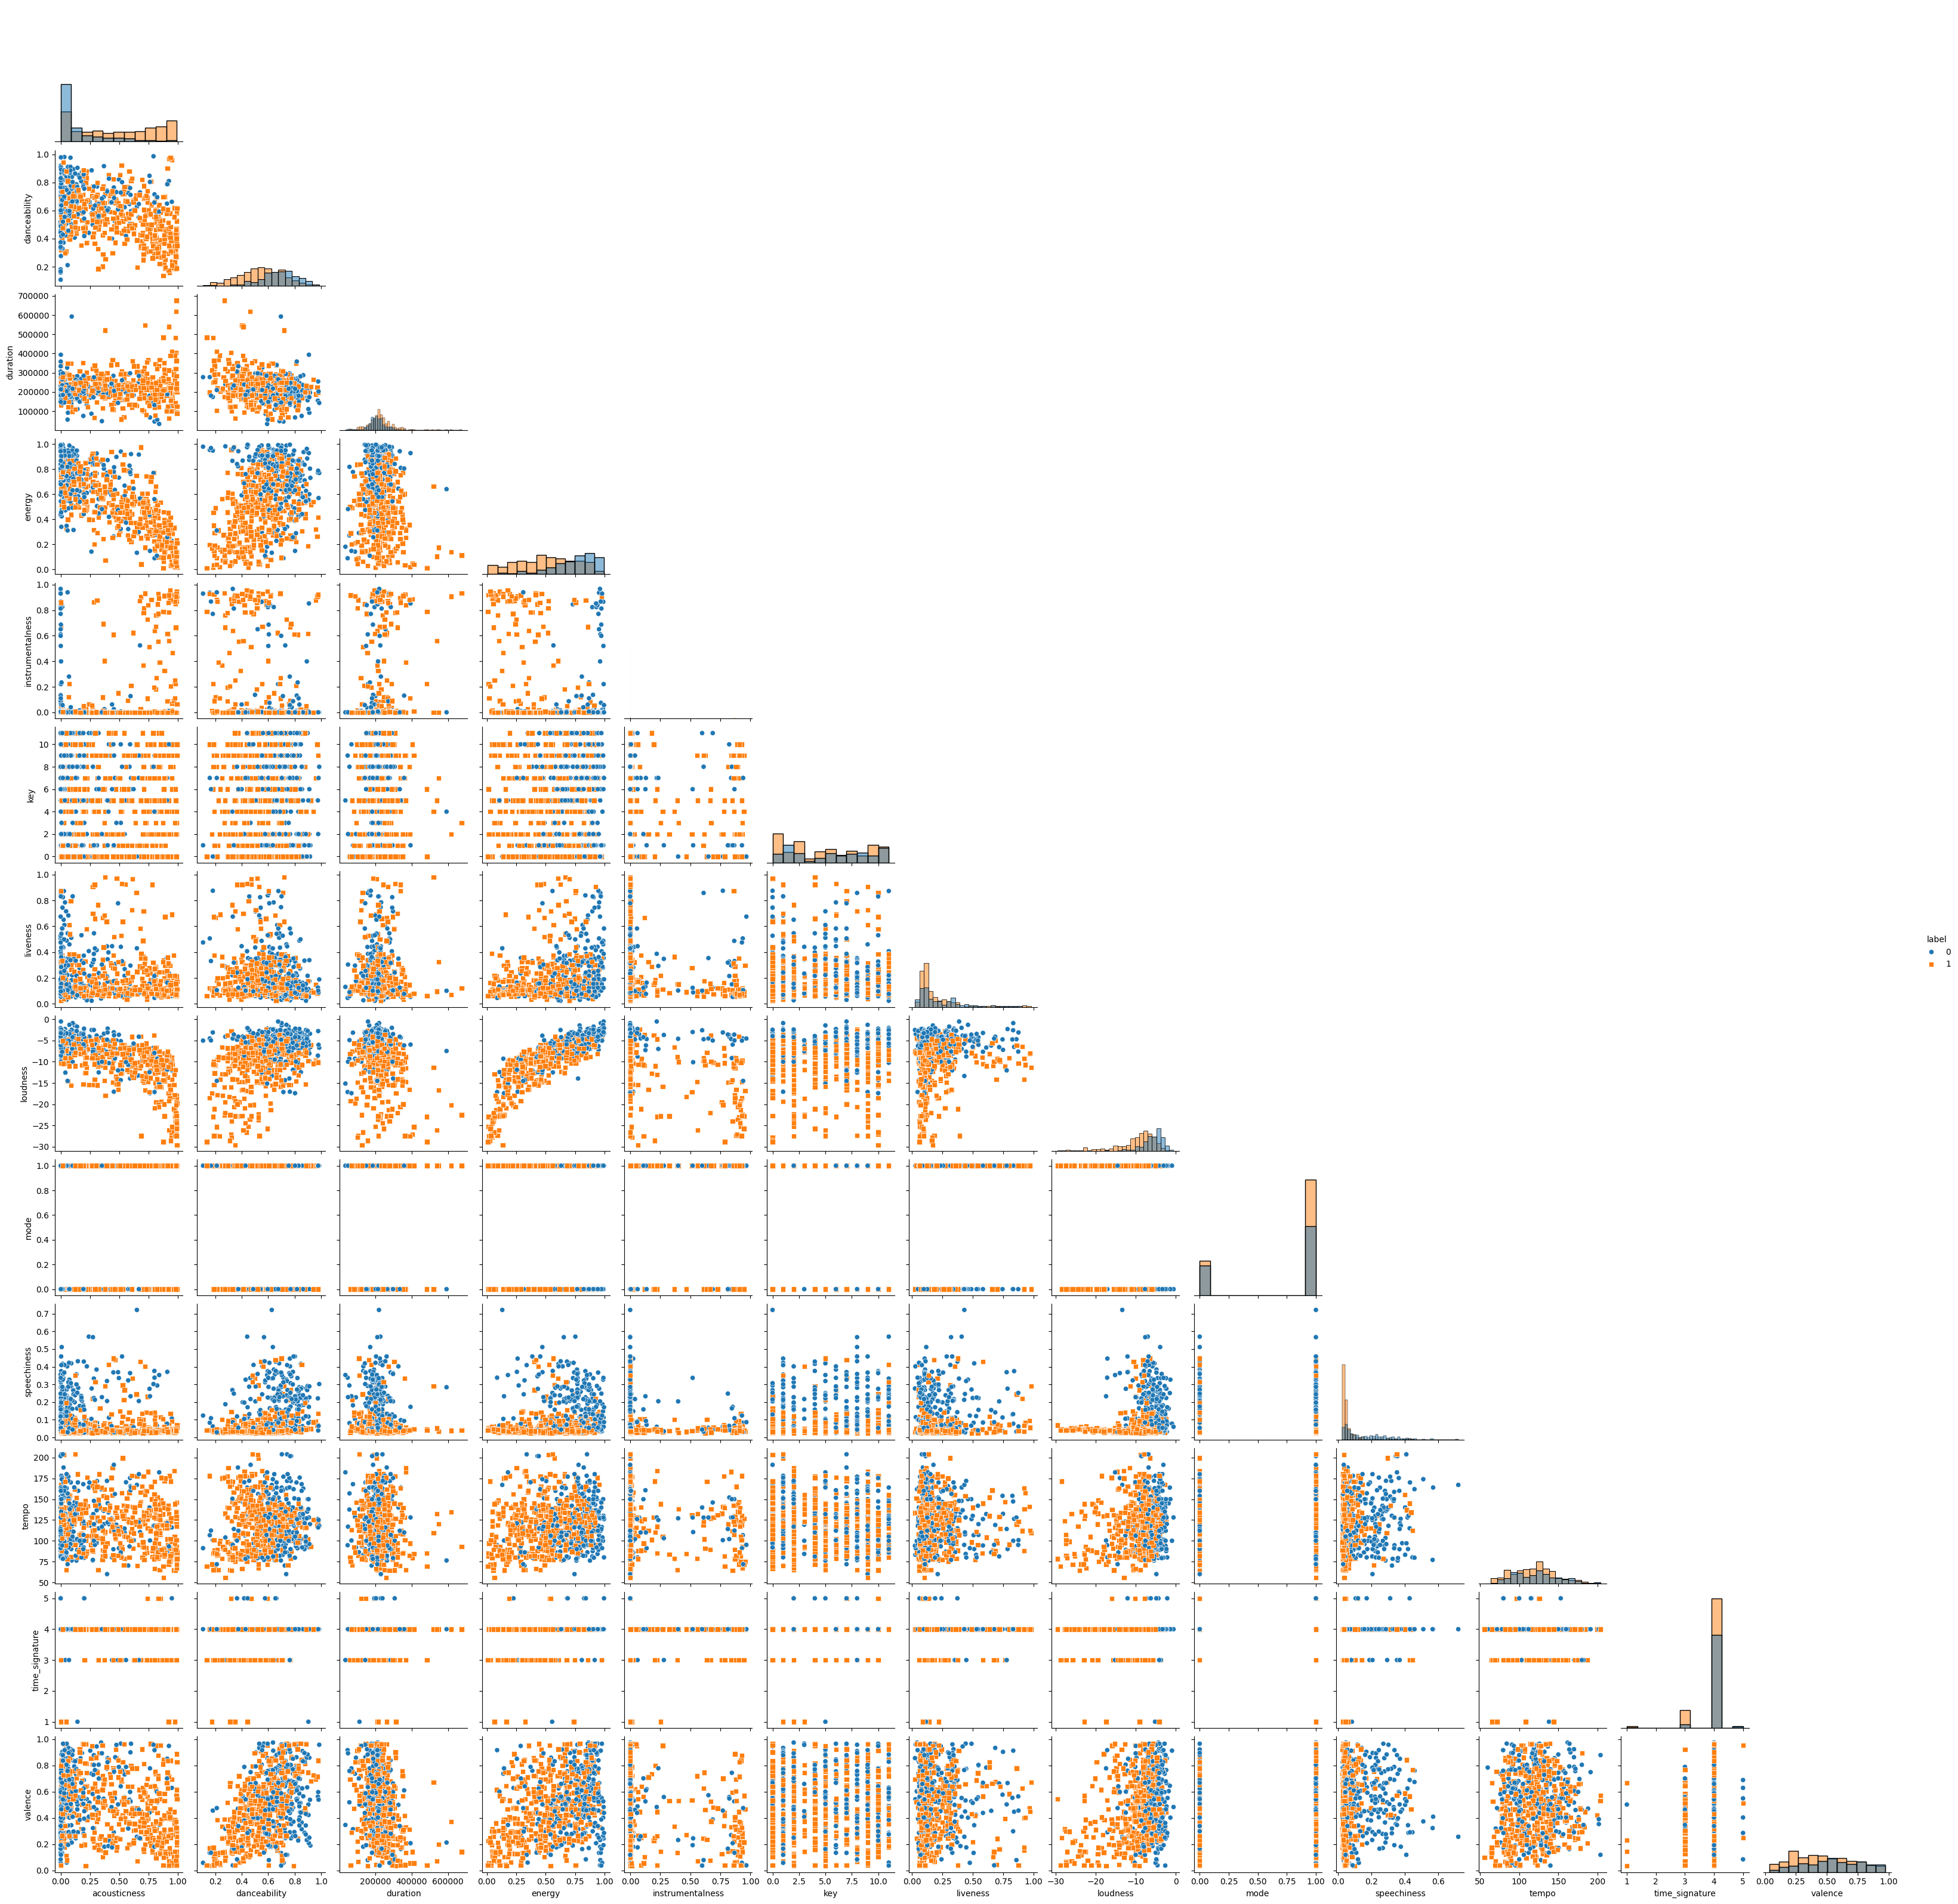

In [10]:
sns.pairplot(df, hue="label", diag_kind="hist", corner=True, markers=["o", "s"])

Analizamos como estan balanceadas las variables cetgoricas, en especial la variable objetivo 'label'

<Axes: xlabel='key', ylabel='count'>

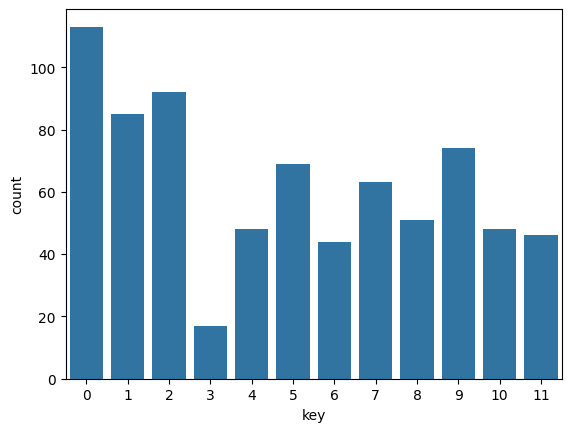

In [11]:
# Graficor la distribución de las variable key
sns.countplot(x="key", data=df)

<Axes: xlabel='mode', ylabel='count'>

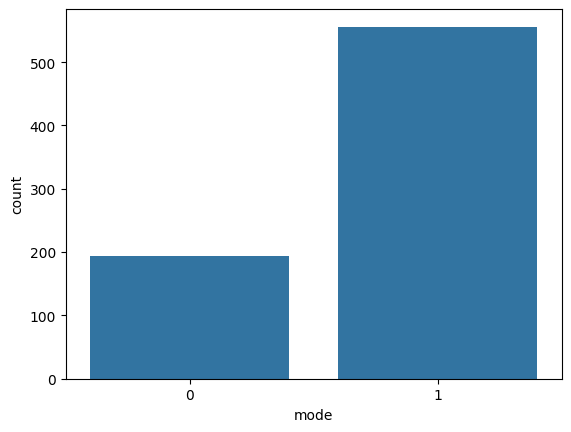

In [12]:
# Graficor la distribución de las variable mode
sns.countplot(x="mode", data=df)

<Axes: xlabel='label', ylabel='count'>

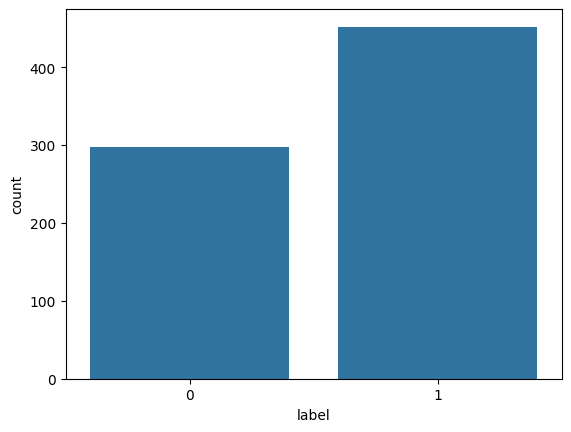

In [13]:
# Graficor la distribución de las variable label
sns.countplot(x="label", data=df)

# Sesgo y curtosis

Analizamos la distribución de las variables o carácteristicas de las canciones que hacen parte de la lista de reproducción que ha evaluado el usuario.

In [14]:
# Calculo la simetria de las variables
df_skew = df[NUMERICAL_FEATURES].skew()
df_skew

acousticness        0.534804
danceability       -0.311981
duration            1.576231
energy             -0.458765
instrumentalness    2.488166
liveness            2.156240
loudness           -1.693115
speechiness         2.040370
tempo               0.334763
valence             0.104812
dtype: float64

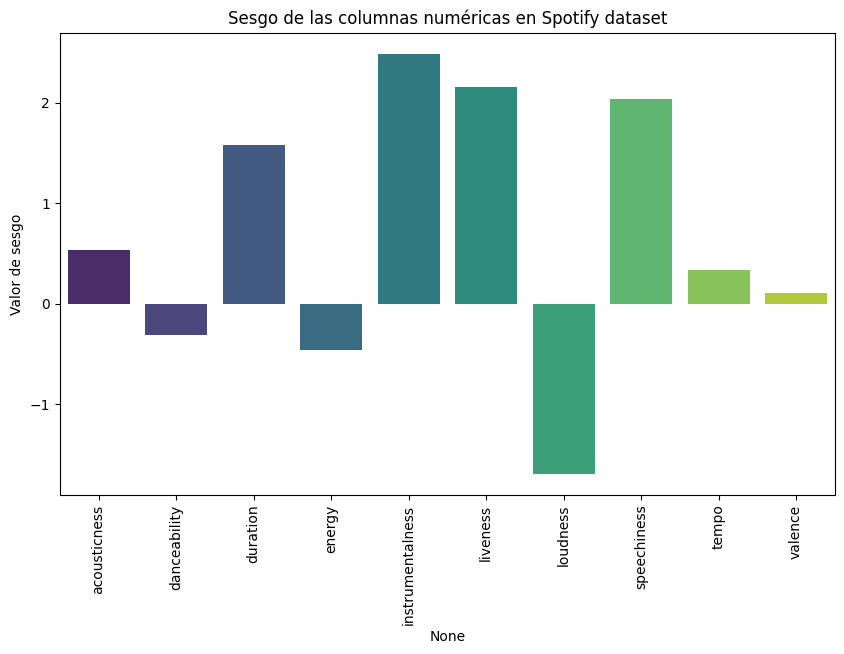

In [16]:
# Grafico la simetria de las variables

plt.figure(figsize=(10,6))
#sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis")
sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis", hue=df_skew.index, legend=False)

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Sesgo de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de sesgo')

# Mostrar el gráfico
plt.show()

Los valores de sesgo-asimetría nos muestra lo siguiente del conjunto de datos:
* La distribución de las variables **instrumentalness**,**liveness**, **speeachiness**, **loudness** y **duration** están altamente sesgadas. Es decir, que sus distribuciones no son normales y presenta una distribución desequilibrada. Los valores positivos nos indican que los datos tienen más peso a la derecha de la distribución, al contrario con valores negativos. Si se quiere ver graficamente este hecho se puede observar la diagonal principal de la pairplot hecha anteriormente.

* Este tipo resultado se espera en la variable duration dado que la duración de una pista es un estandar en la insdustria músical. 

Más adelante con el cambio de estas a variables catégoricas será más evidente este sesgo. 

In [17]:
# Calculo la curtosis de las variables numéricas
df_kurtosis = df[NUMERICAL_FEATURES].kurtosis()
df_kurtosis

acousticness       -1.210296
danceability       -0.296706
duration            8.321863
energy             -0.758962
instrumentalness    4.518012
liveness            4.842701
loudness            3.232917
speechiness         4.149336
tempo              -0.246166
valence            -0.911007
dtype: float64

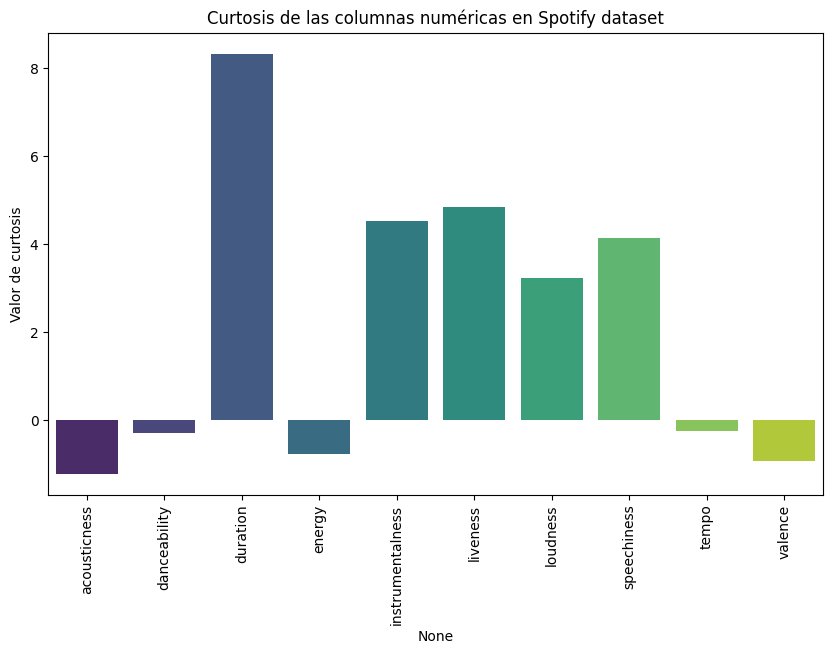

In [19]:
# Grafico kurtosis
# Crear un gráfico de barras
plt.figure(figsize=(10,6))
#sns.barplot(x=df_kurtosis.index, y=df_kurtosis.values, palette="viridis")
sns.barplot(x=df_kurtosis.index, y=df_kurtosis.values, palette="viridis", hue=df_kurtosis.index, legend=False)

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Curtosis de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de curtosis')

# Mostrar el gráfico
plt.show()

En este caso los datos leptocúrticos son **instrumentalness**,**liveness**, **speeachiness**, **loudness** y **duration**. Lo que significa que tenemos distribuciones con grandes concentraciones de valores en un intervalo dado.

# Grafico de boxplot

Creamos los diagramas de cajas y bigotes para las variables numericas divididas según la variable objetivo que en este caso es 'label'. Con este podemos observar en general la distribución de dichas variables.

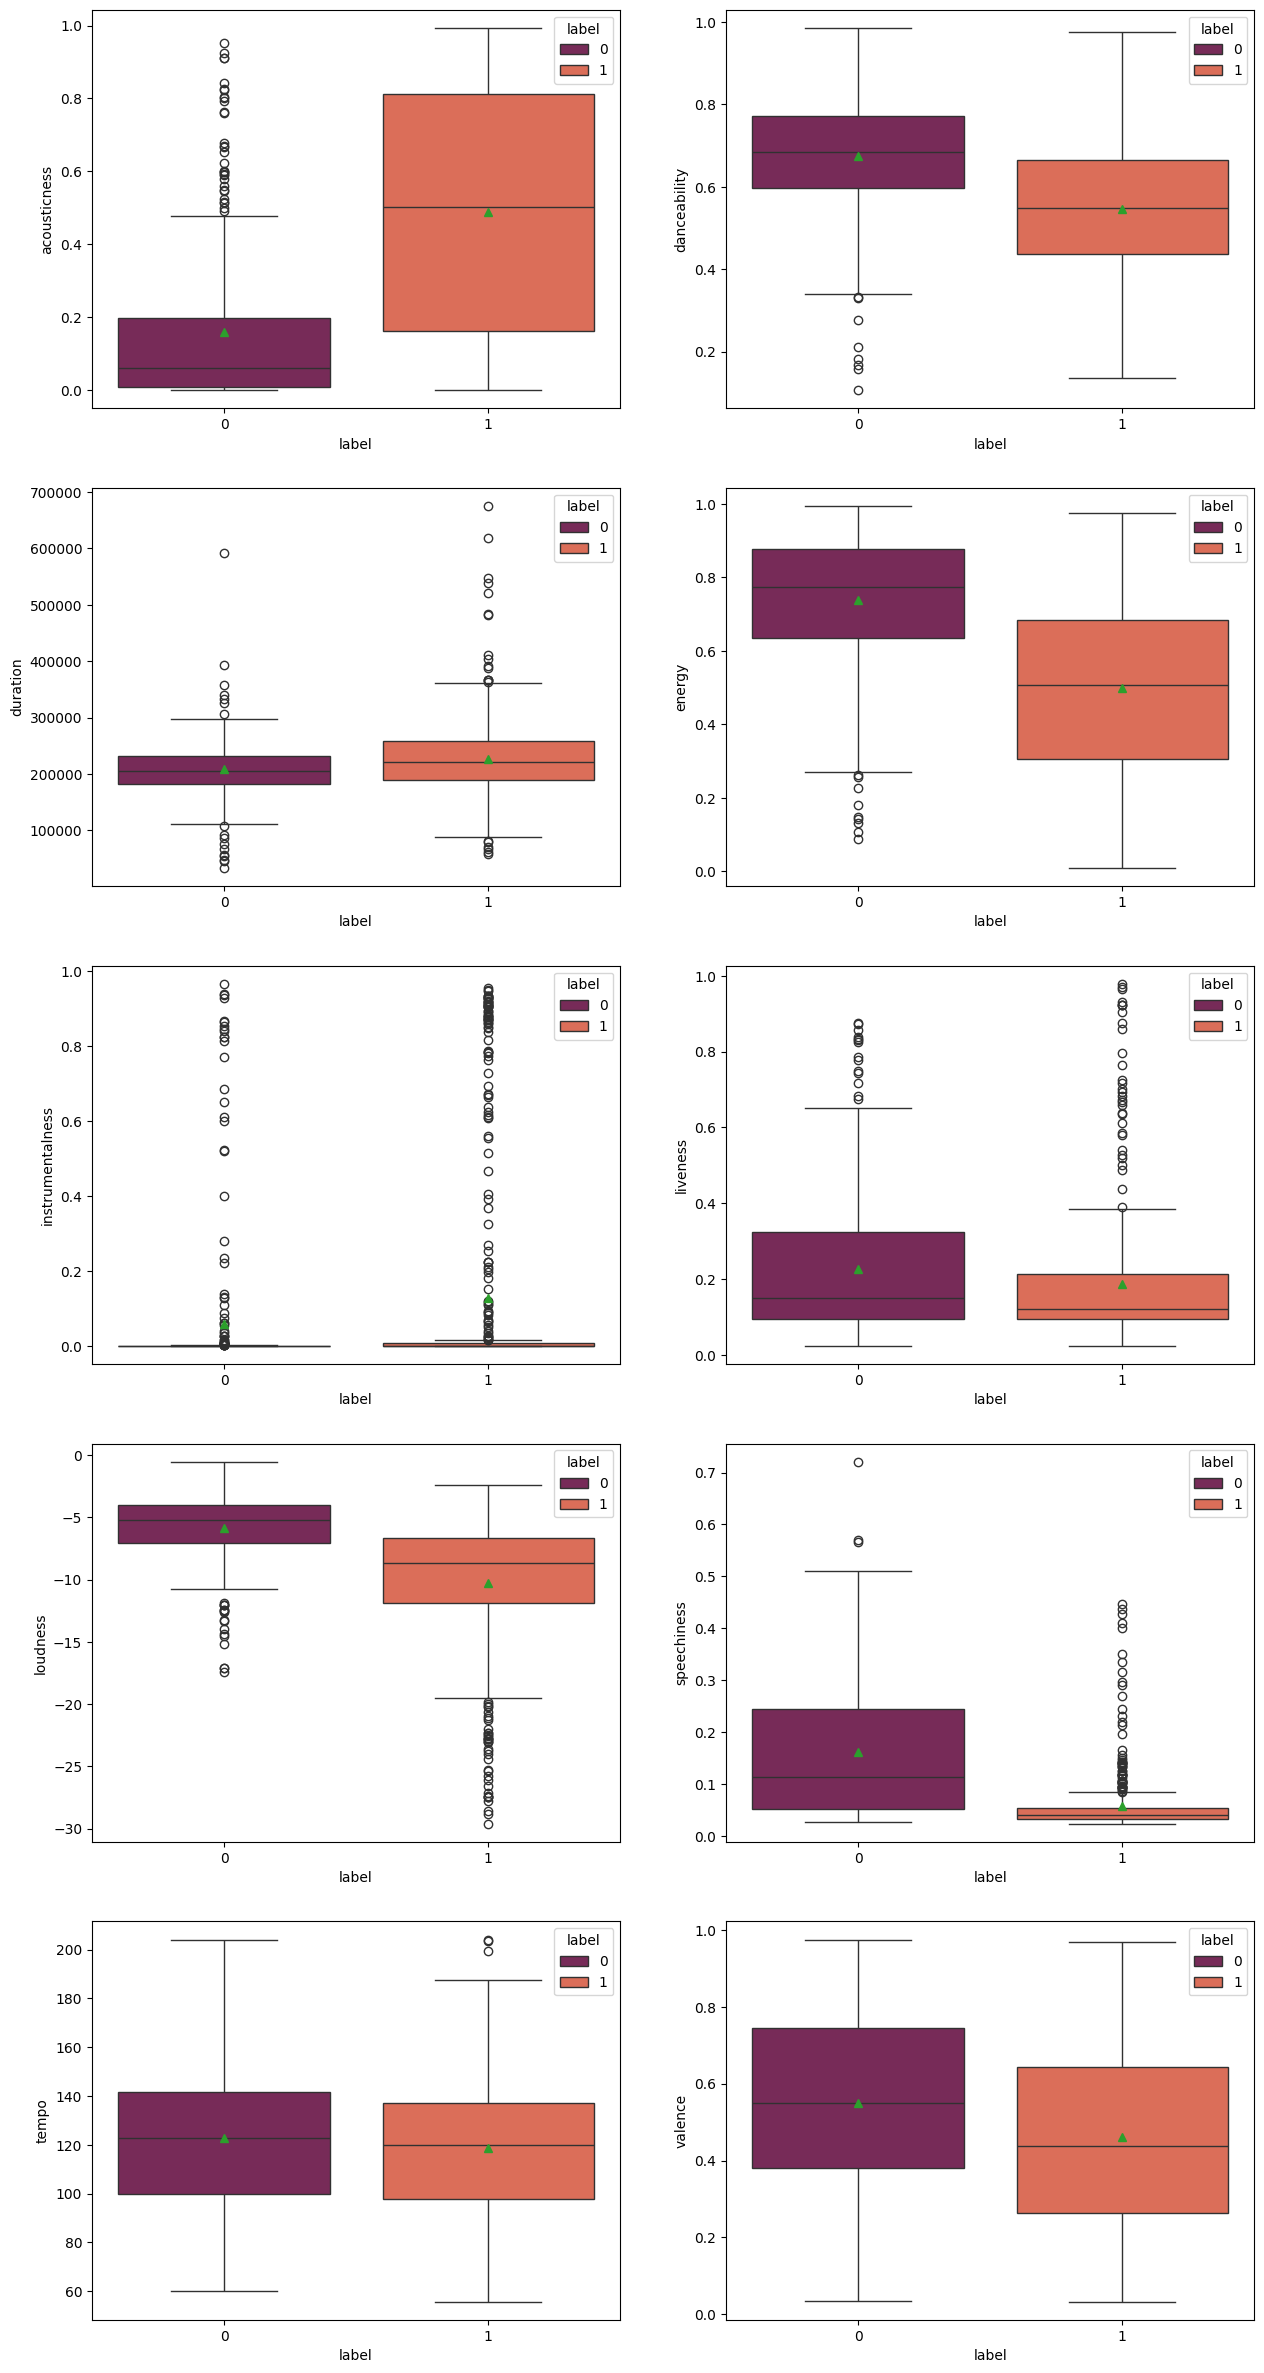

In [20]:
# creamos los diagramas de cajas y bigotes para las variables numericas

plt.figure(figsize=(15, 30))
for i, c in enumerate(NUMERICAL_FEATURES, 1):
    plt.subplot(5, 2, i) 
    sns.boxplot(x='label', y=c, orient='v', data=df, hue='label', palette="rocket", showmeans=True)

 

Se puede decir que dos ditribuciones son diferentes si ...

La distribución de las variables según el label dado por el usuario revela algunas preferencias marcadas :

* Según la distribución de la variable **acousticness**, el usuario tiene preferencia por pistas que con un valor mayor a 0.2. Sin embargo, hay algunas con esta característica que son outliers y no son de su gusto.
* El usuarió tiene preferencia por canciones con una **energía** por debajo de 0.6 al igual de una **loudness** por debajo de -6. Estas dos variables están altamente correlacionadas de forma lineal en la mayoría de las pistas, con una correlación de Pearson de 0.86. 
* Según la varibale **speechiness** el usuario no presenta un gusto predominante por las pistas habladas.  
* Hay variables que no parecen influir en el gusto por la pista, dado que tienen distribuciones parecidas y se pueden considerar igual, como lo son el **tempo**,**liveness**,**duration** y la **valencia**.
* El gráfico de **instrumentalness** no otroga información clara de la distribucón dada la gran cantidad de outliers. 


## Correlaciones de Pearson

<Axes: >

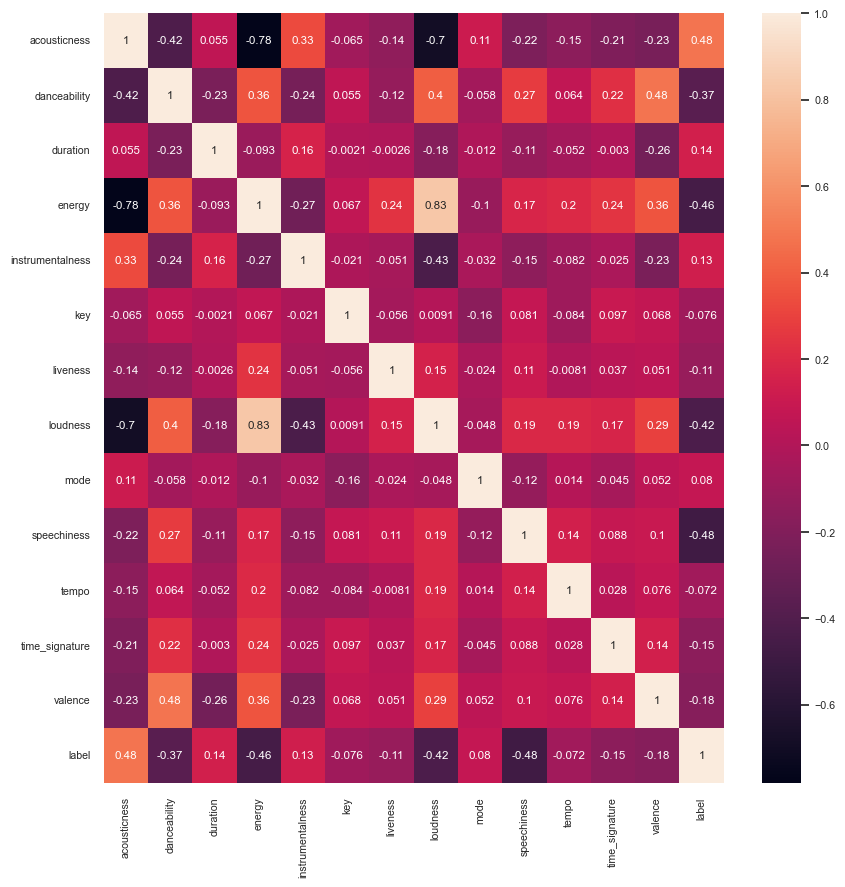

In [21]:
# Graficamos la matriz de correlación de Pearson
plt.figure(figsize=(10,10))
sns.set(font_scale=0.7)
sns.heatmap(df.corr(), annot=True)


Existen varias correlaciones altas que nos hacen pensar que hay variables que se relacionan e interpretan de la misma manera, en el caso de las correlaciones positivas, o son opuestas en el caso de las correlaciones negativas. Son el caso de :
* **Energy** y **loudness** que presentan una correlación de 0.83  indicandonos que pueden describir la misma característica de la canción. Si se llega a probar dicho supuesto una de ellas se debe de eliminar del modelo que se creará pues otorgaría información redundante.
* **Energy** y **acousticness** tienen una correlación negativa de -0.78. De lo que podría inferirse que  las canciones que se consideran acusticas no tienen una clasificación alta en energí y vis ceversa. Esta misma situación se nota entre **energy** u **loudness** con un puntaje de -0.7, resultado de esperarse dada la anterior correlación. 

No se observan otras correlaciones significativas en el dataset.

In [22]:
# Imprimo los valores de mayor a menor de correlación con la variable objetivo
#df.corr()['label'].sort_values(ascending=False)
df.corr()['label'].abs().sort_values(ascending=False)

label               1.000000
speechiness         0.480931
acousticness        0.479307
energy              0.459088
loudness            0.424345
danceability        0.368501
valence             0.178546
time_signature      0.149962
duration            0.138562
instrumentalness    0.133523
liveness            0.108682
mode                0.080375
key                 0.075631
tempo               0.071652
Name: label, dtype: float64

Despues ver ordenar las variables que poseen correlación con la variable objetivo, analizaremos cada una de ellas con respecto a la variable objetivo.

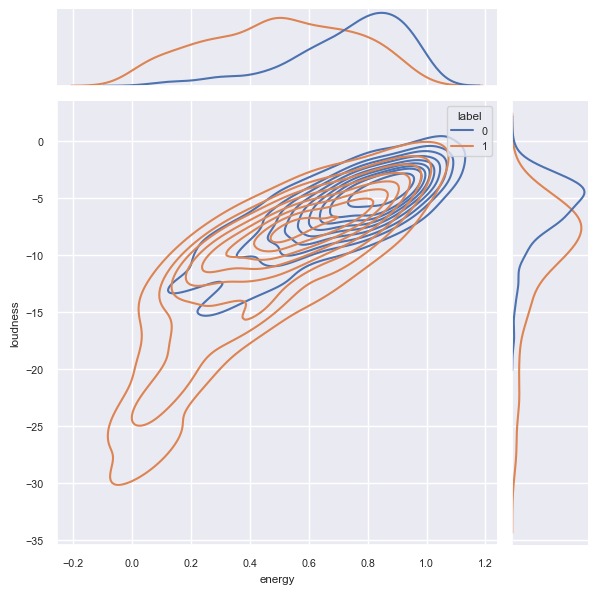

In [23]:
sns.jointplot(data= df, x='energy', y='loudness', hue="label", kind="kde")

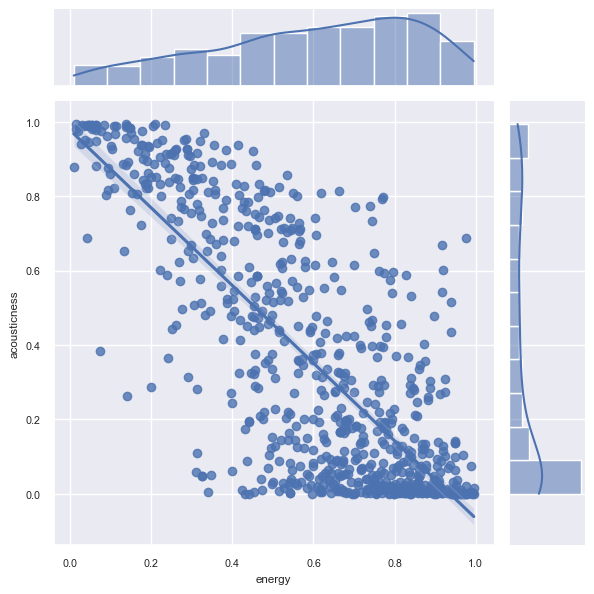

In [24]:
sns.jointplot(data= df, x='energy', y='acousticness', kind="reg")

### Veamos como se relacionan "speechiness" y "label"

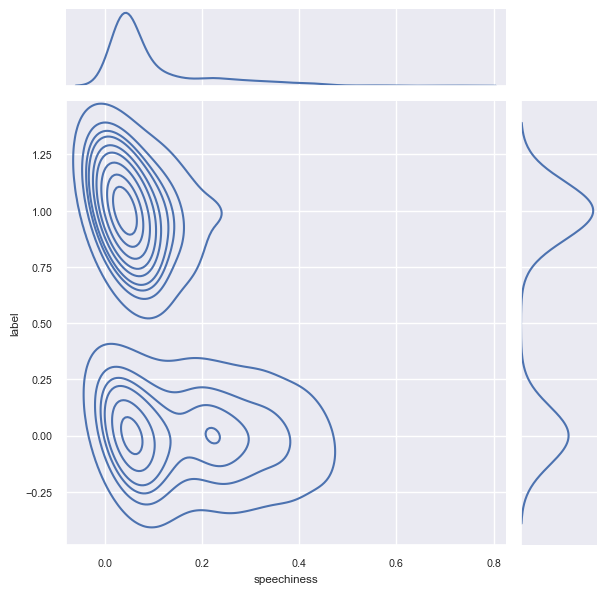

In [25]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='speechiness',y='label',data=df,kind='kde')
plt.show()

Podemos decir que tanto los que les gusto y  los que no les gusto la cancion tienen preferencia a las canciones con nivel de spechiness menor de 0.5, prefieren no tan habladas.

### Veamos como se relacionan "acousticness" y "label"

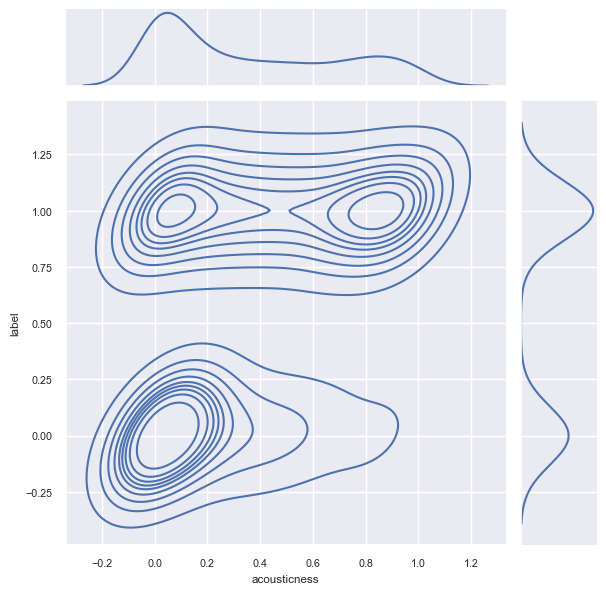

In [26]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='acousticness',y='label',data=df,kind='kde')
plt.show()

Podemos decir que a los que les gusta mas una canción poseen un nivel de gusto parejo por lo acustico, mientras que los que no les gusta canciones acusticas. (¿Creo que esta bien ese analisis?)

### Veamos como se relacionan "energy" y "label"

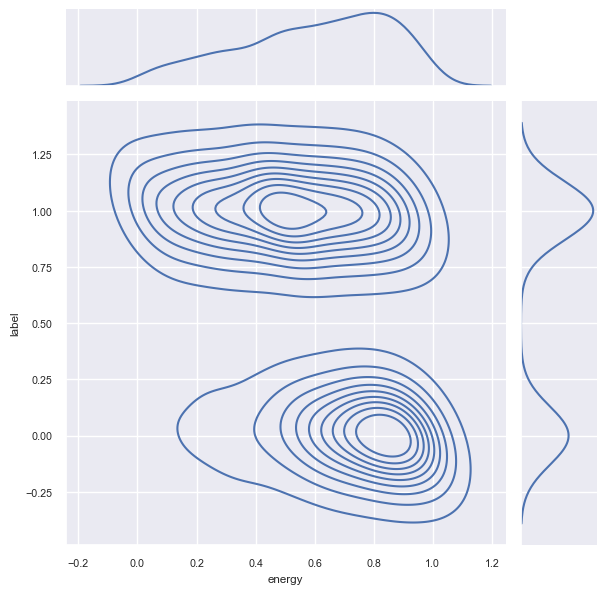

In [27]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='energy',y='label',data=df,kind='kde')
plt.show()

### Veamos como se relacionan "danceability" y "label"

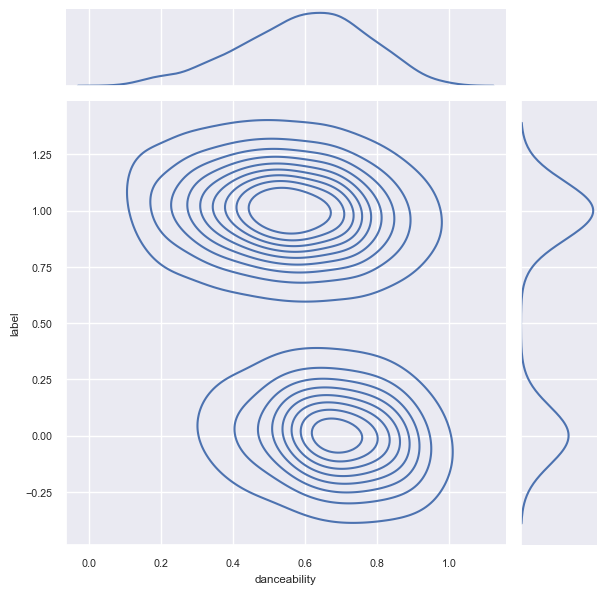

In [28]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='danceability',y='label',data=df,kind='kde')
plt.show()

Podemos argumentar que la tendencia de los que les gusto es intermedio, mientras que los que no les gusto escucharon temas de mucha energia.

### Veamos ahora la relación entre "duration" y "label"

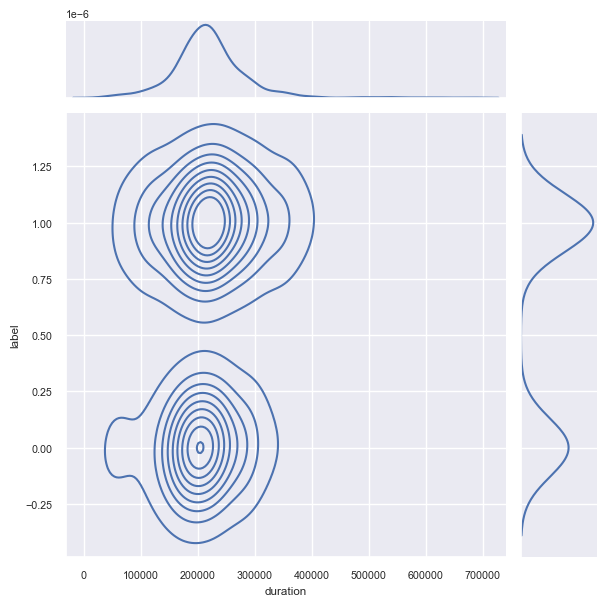

In [29]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='duration',y='label',data=df,kind='kde')
plt.show()

La duración es el estandar de la industria. Es igual sea label que sea.

### Ahora veamos la relación "instrumentalness" y "label"

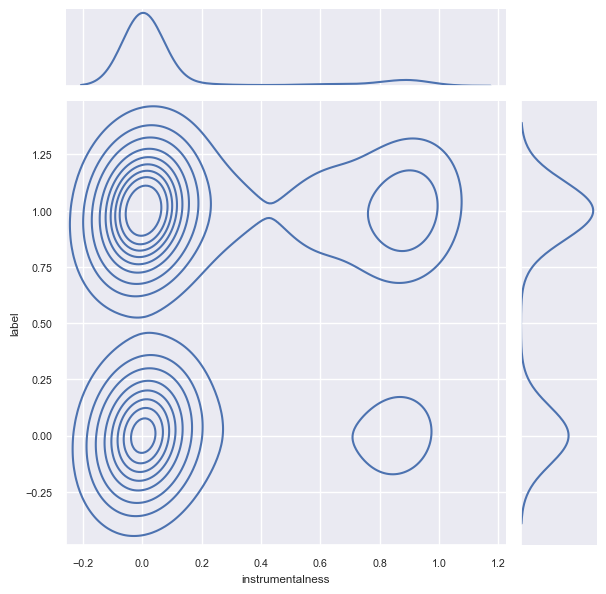

In [30]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='instrumentalness',y='label',data=df,kind='kde')
plt.show()

Según el gráfico, a los que les gusto una canción prefieren en mayor grado que no sea instrumental.
Y a los que no les gusto, escucharon escucharon canciones no instrumentales.
O sea,m la tendencia fue que se escucho mas canciones que no sean netamente instrumentales.


### Ahora veamos la relación "mode" y "label"

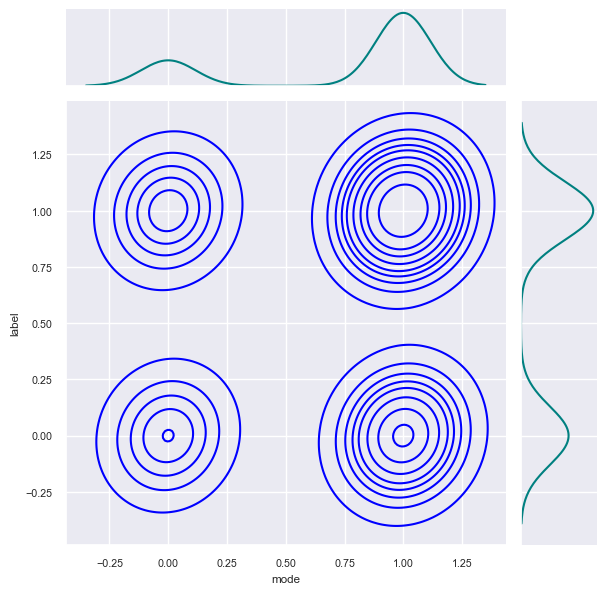

In [31]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='mode',y='label',data=df,kind='kde',color="skyblue",
                      marginal_kws={"color": "teal"}, joint_kws={ "color": "blue"})
plt.show()

### Ahora veamos la relación "tempo" y "label"

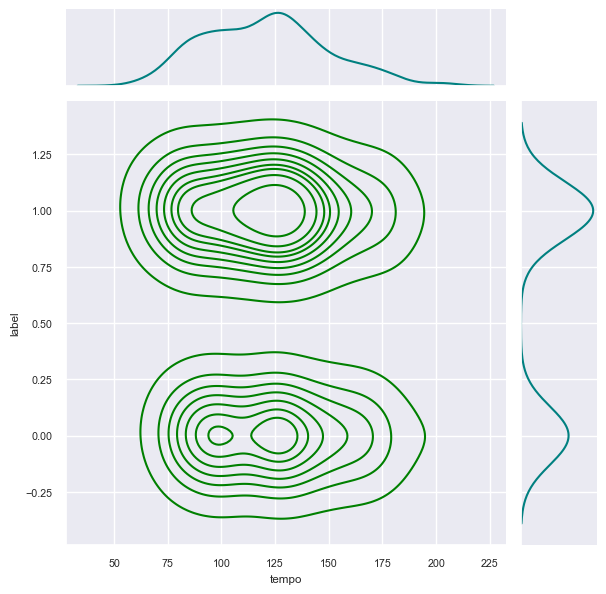

In [32]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='tempo',y='label',data=df,kind='kde',color="skyblue",
                      marginal_kws={"color": "teal"}, joint_kws={ "color": "green"})
plt.show()

#Aquí tenenos información redundante #TODO

In [33]:
def plot_label_horizontal_bar(col, title=None):
    data = df.groupby('label')[col].mean().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    valoresLabel = df["label"].unique()

    data.plot.barh( valoresLabel,color=colors)
    plt.xlabel(col)
    plt.title(title, fontdict={'size': 18, 'color': '#de5d55'})
    plt.show()

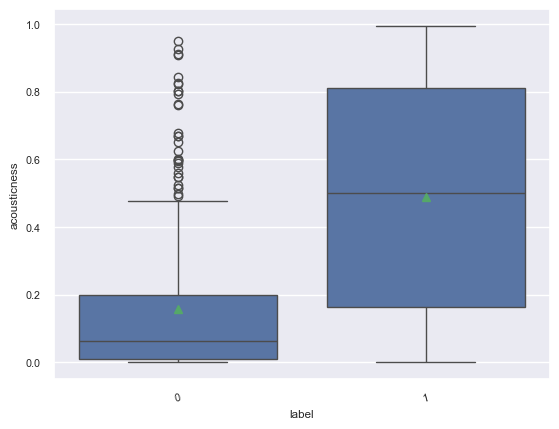

In [34]:
sns.boxplot(data=df, x='label', y='acousticness', showmeans=True)
plt.xticks(rotation=15)
plt.show()

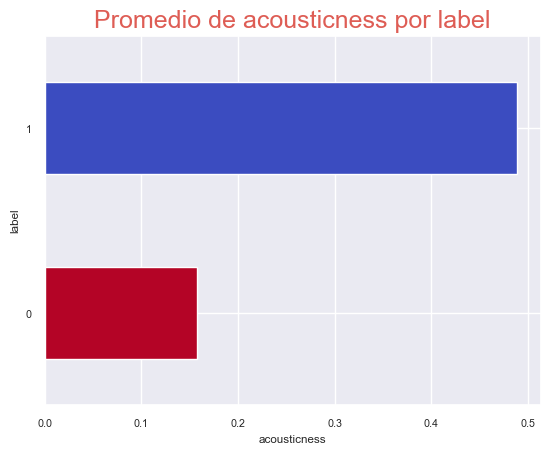

In [35]:
plot_label_horizontal_bar('acousticness', title="Promedio de acousticness por label")

- Las canciones que mas gustaron tienen una puntuacion mínima de acustica (acousticness) 

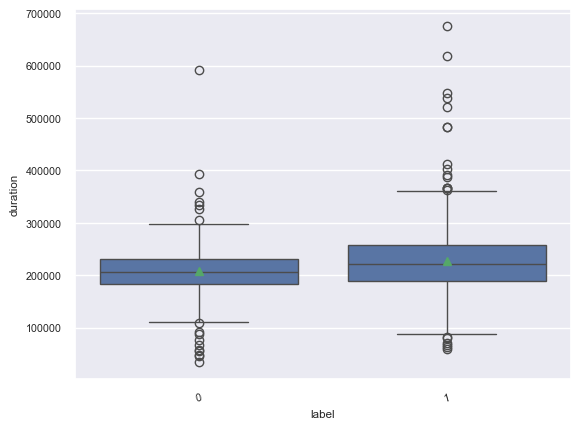

In [36]:
sns.boxplot(data=df, x='label', y='duration', showmeans=True)
plt.xticks(rotation=15)
plt.show()

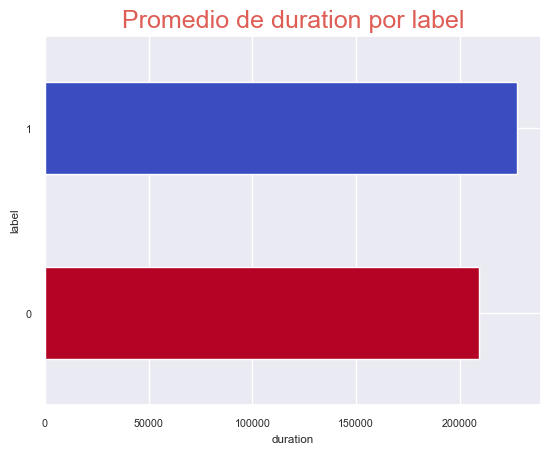

In [37]:
plot_label_horizontal_bar('duration', title="Promedio de duration por label")

- La duración de la canción sigue el estandar de la industria, no afecta a la decisión, son similares.

In [38]:
# sns.boxplot(data=df, x='label', y='instrumentalness', showmeans=True)
# plt.xticks(rotation=15)
# plt.show()

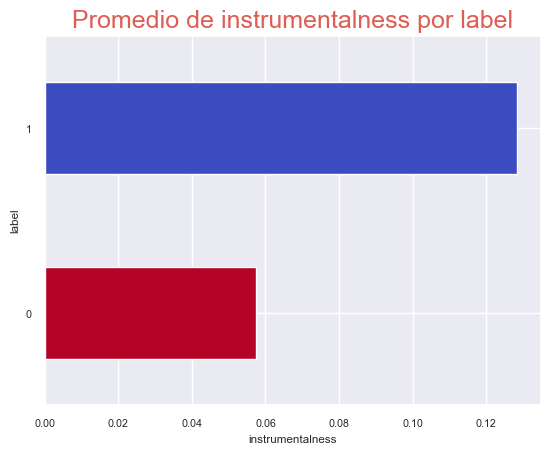

In [39]:
plot_label_horizontal_bar('instrumentalness', title="Promedio de instrumentalness por label")

- Las canciones que mas gustaron tienen una puntuacion maxima instrumental  (instrumentalness) 

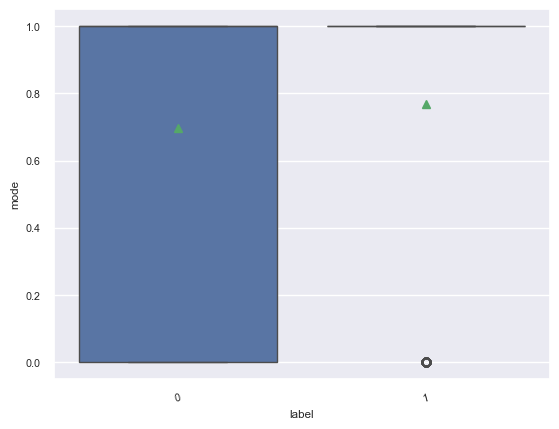

In [40]:
sns.boxplot(data=df, x='label', y='mode', showmeans=True)
plt.xticks(rotation=15)
plt.show()

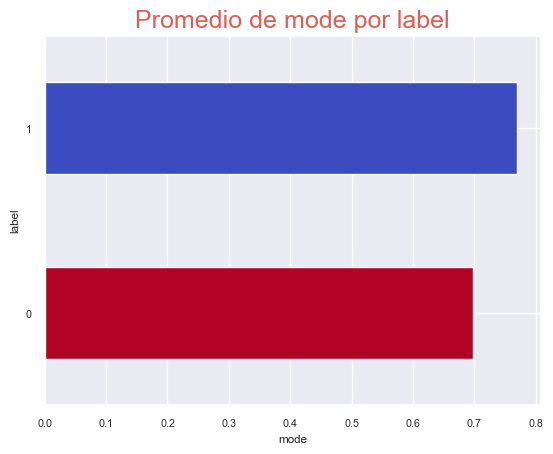

In [41]:
plot_label_horizontal_bar('mode', title="Promedio de mode por label")

- Tanto los que les gusto como los que no, prefieren canciones mas alegres y felices o sea modo cercano al 1.

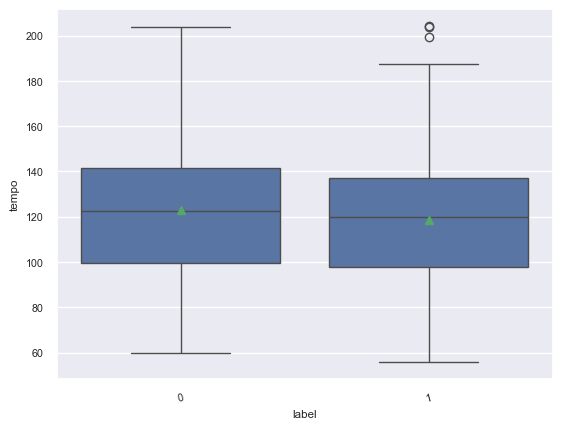

In [42]:
sns.boxplot(data=df, x='label', y='tempo', showmeans=True)
plt.xticks(rotation=15)
plt.show()

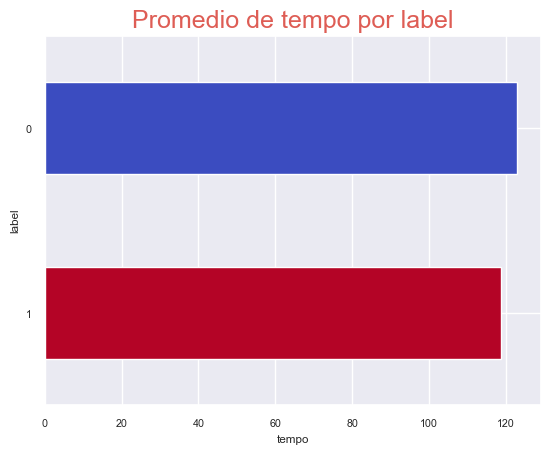

In [43]:
plot_label_horizontal_bar('tempo', title="Promedio de tempo por label")

# Grafico de Q-QPlot

Grafico qqplot para la columna 'speechiness'

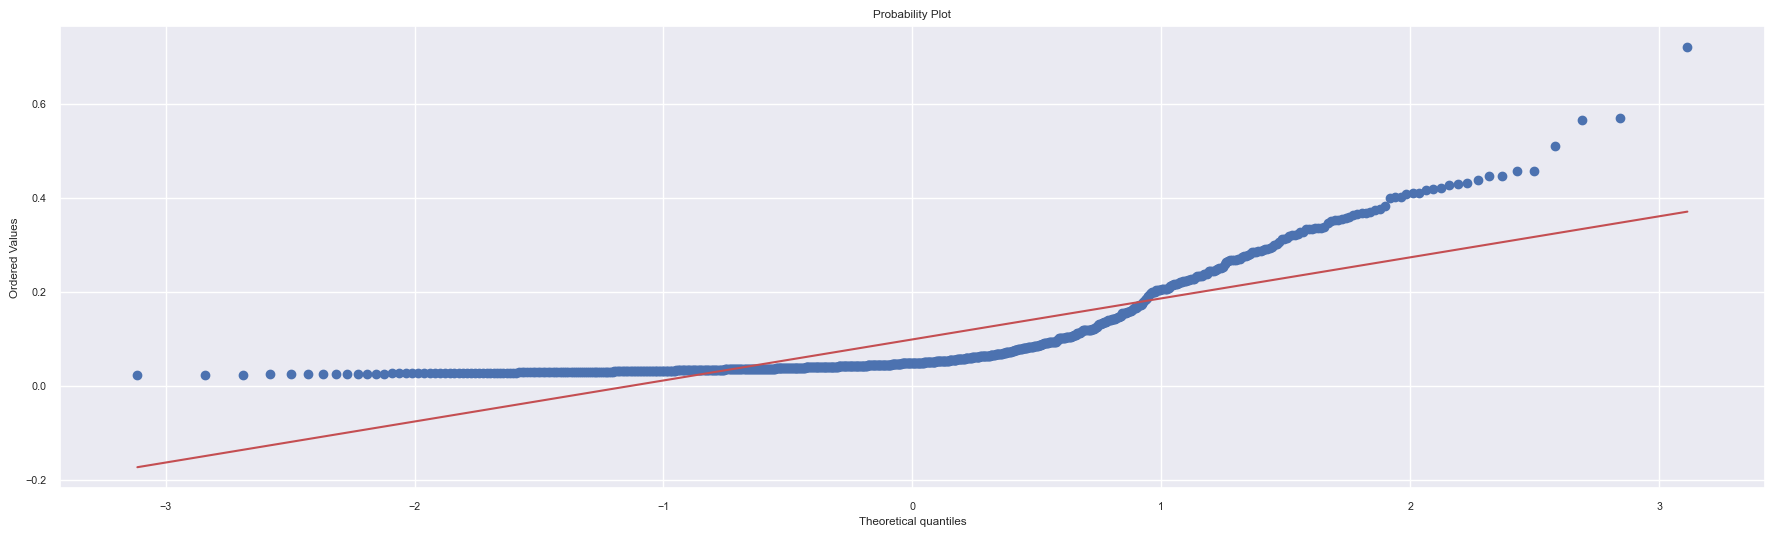

In [44]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['speechiness'], dist="norm", plot=axes);

Grafico qqplot para la columna 'acousticness'

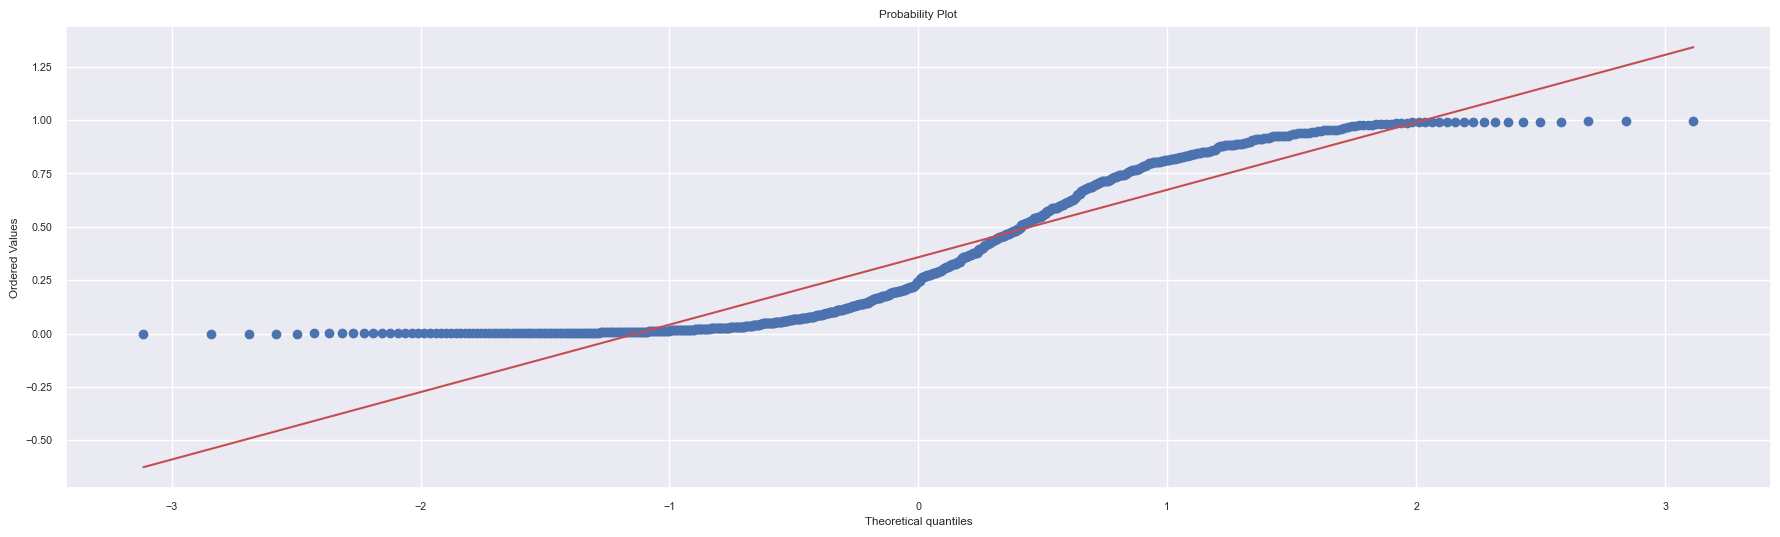

In [45]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['acousticness'], dist="norm", plot=axes);

Grafico qqplot para la columna 'energy'

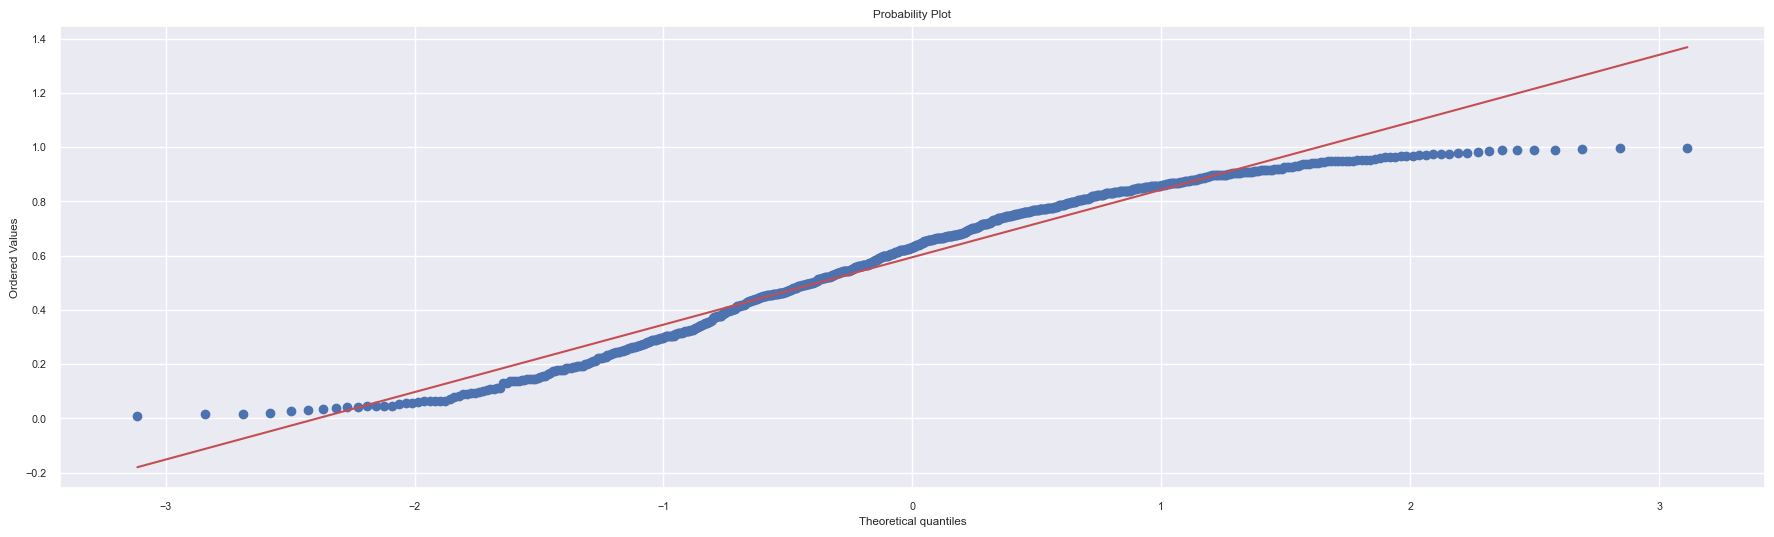

In [46]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['energy'], dist="norm", plot=axes);

Grafico qqplot para la columna 'loudness'

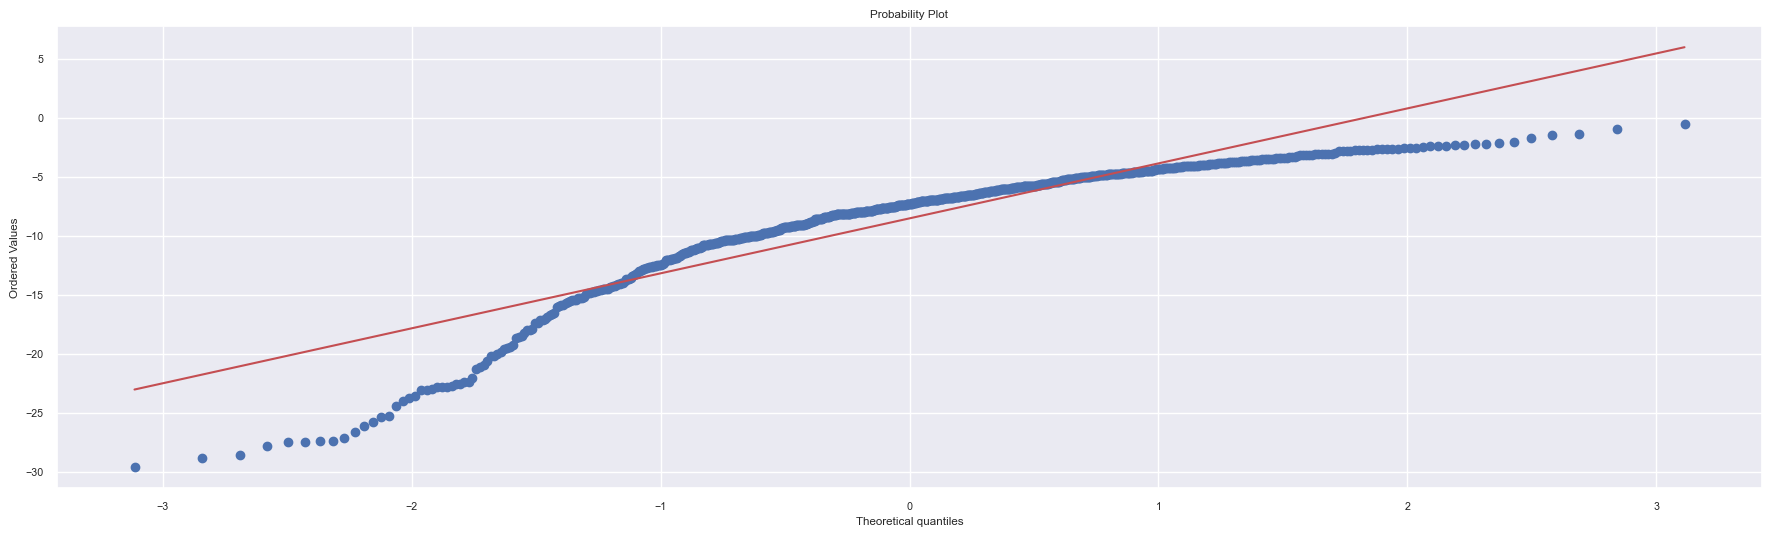

In [47]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['loudness'], dist="norm", plot=axes);

Grafico qqplot para la columna 'danceability'

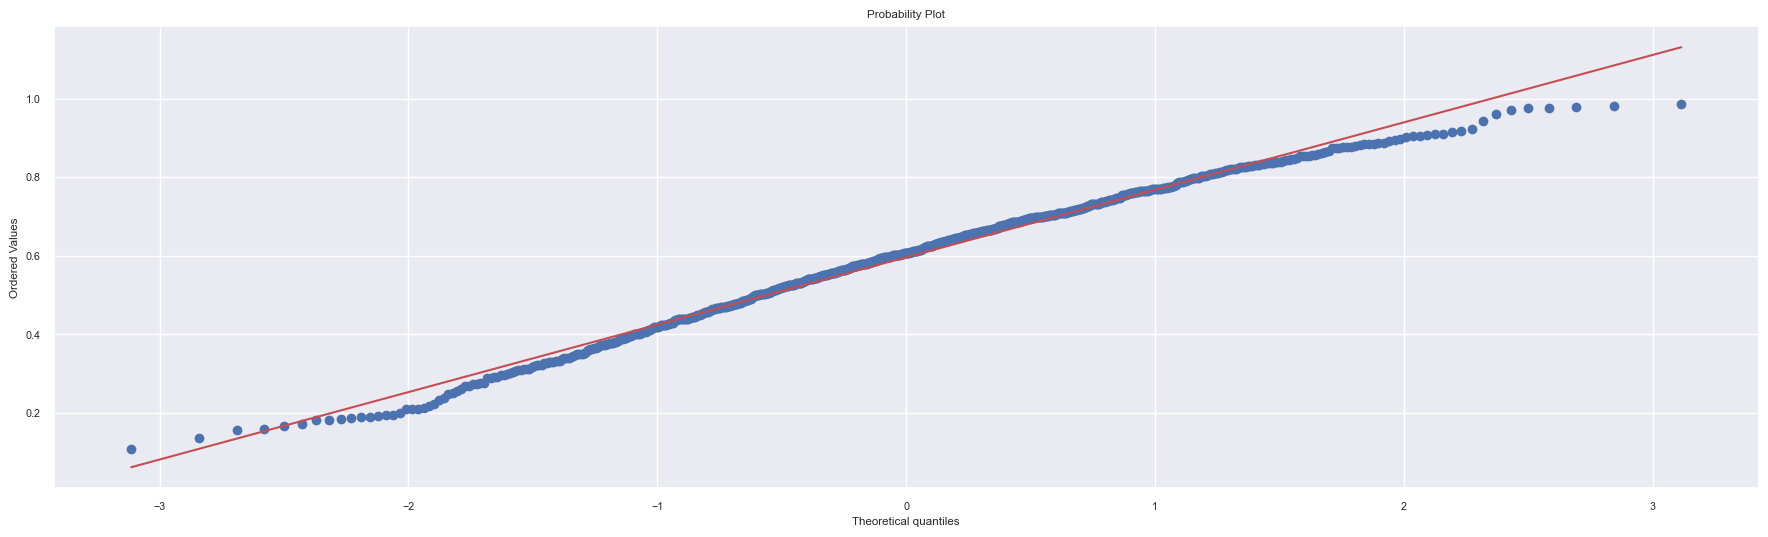

In [48]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['danceability'], dist="norm", plot=axes);

Grafico qqplot para la columna 'valence'

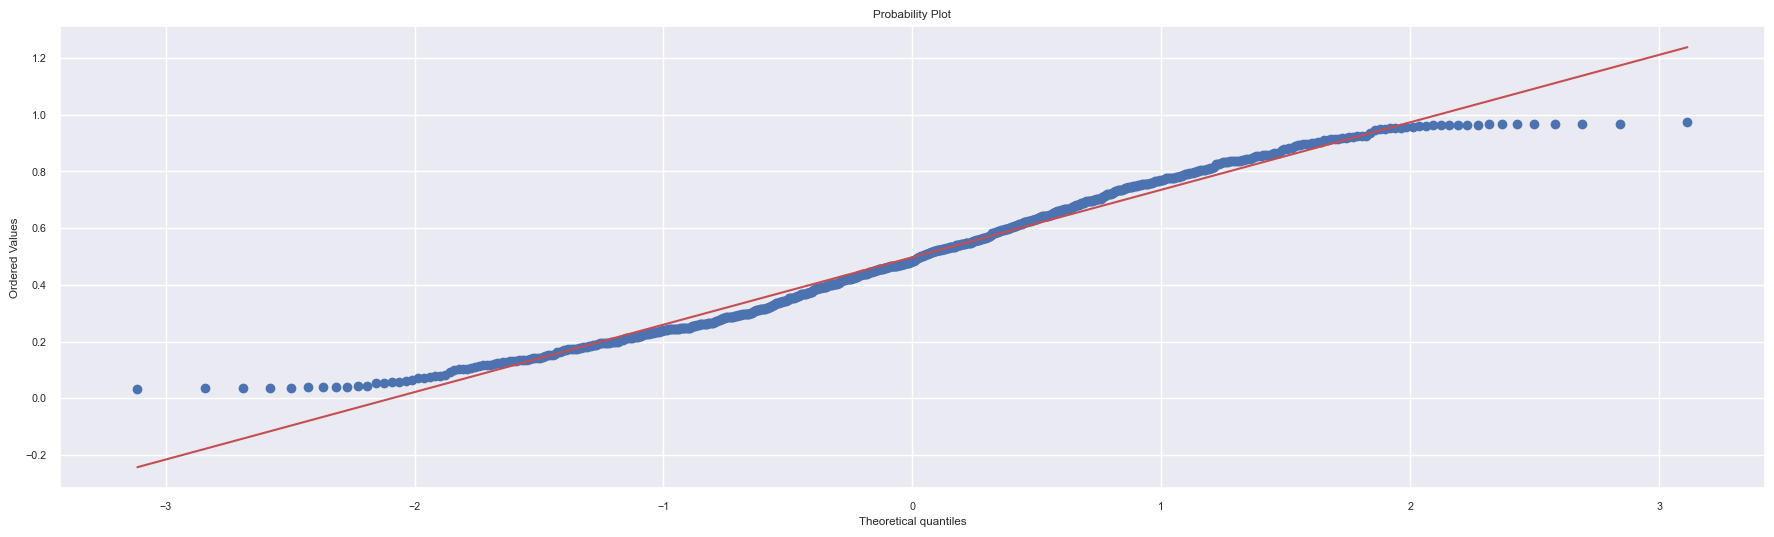

In [49]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['valence'], dist="norm", plot=axes);

Grafico qqplot para la columna 'duration'

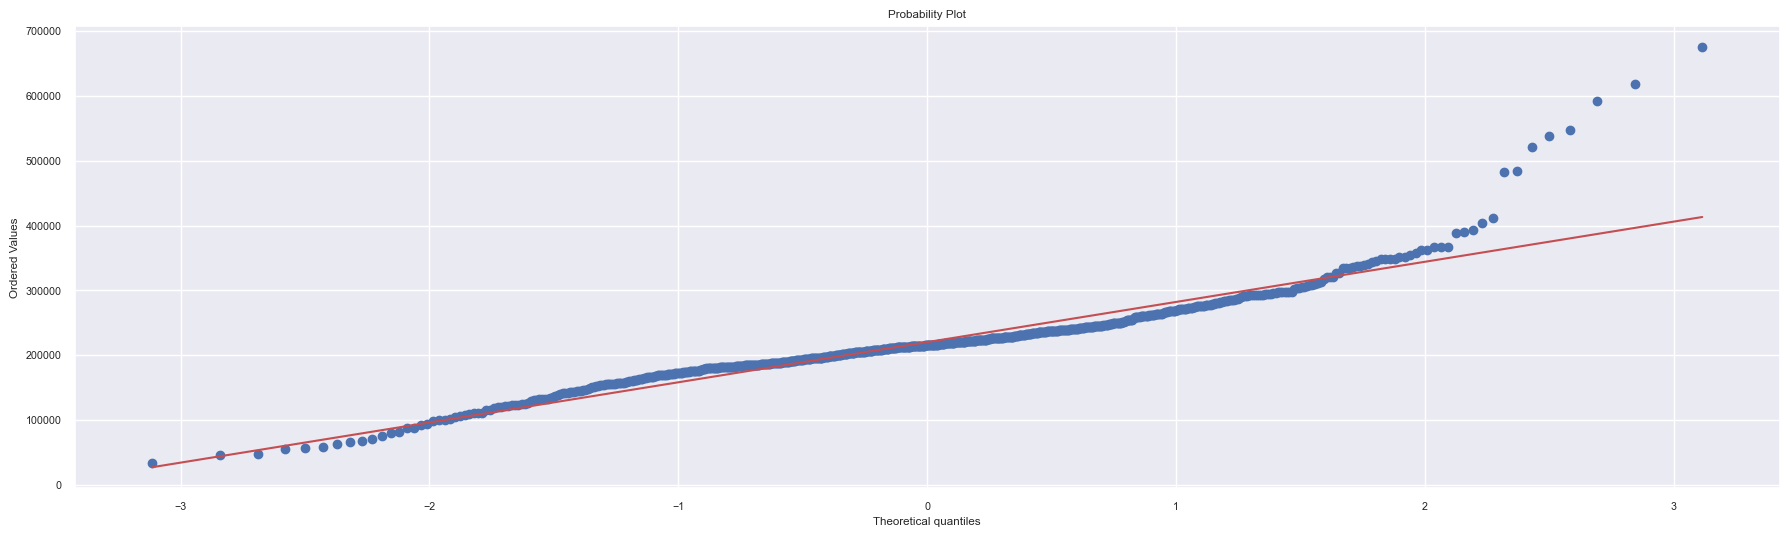

In [50]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['duration'], dist="norm", plot=axes);

Grafico qqplot para la columna 'instrumentalness'

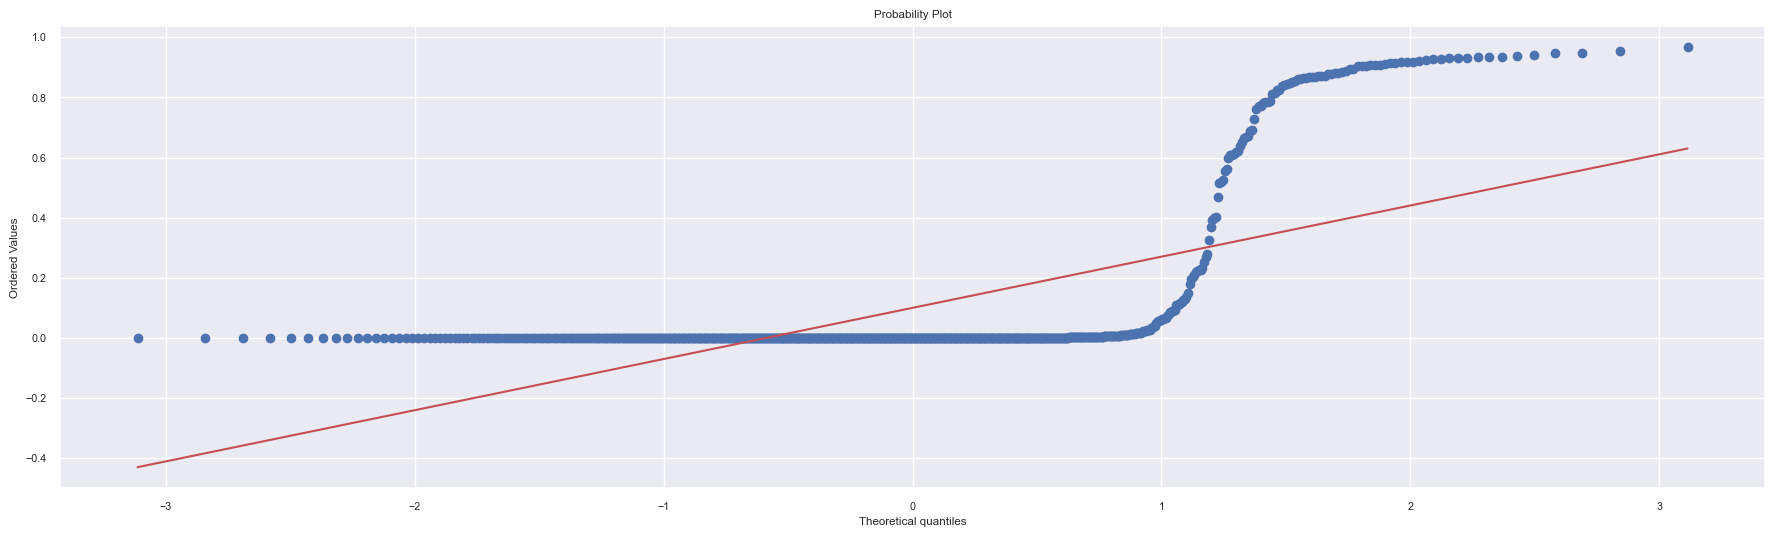

In [51]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['instrumentalness'], dist="norm", plot=axes);

Grafico qqplot para la columna 'liveness'

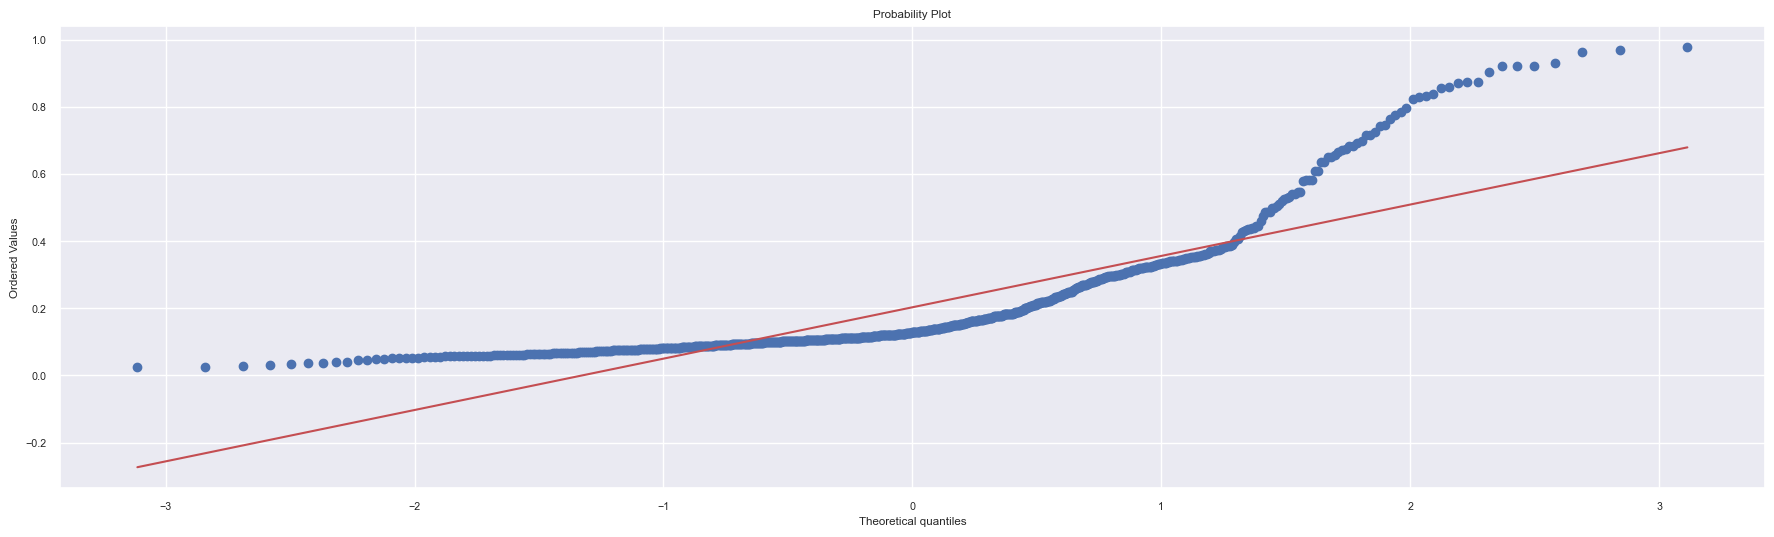

In [52]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['liveness'], dist="norm", plot=axes);

Grafico qqplot para la columna 'tempo'

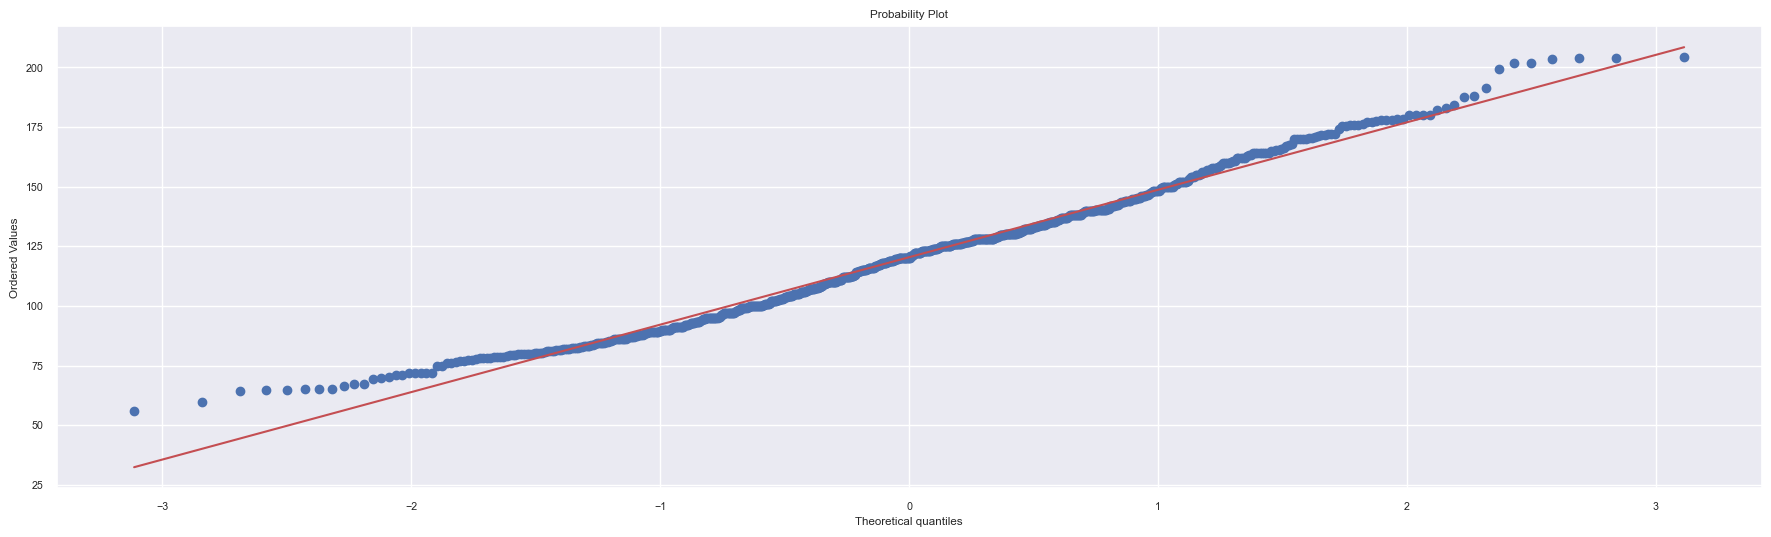

In [53]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df['tempo'], dist="norm", plot=axes);

### Observaciones

Las siguientes columnas se podrian convertir en variables categoricas:

speechiness:
 - 0 : 0 menor a 0.33    => musica con canto
 - 1 : entre 0.33 y 0.66 => rap
 - 2 : mayor a 0.66      => audolibro

acousticness:
- 0 : 0 menor a 0.50 => No es acustico
- 1 : 1 mayor a 0.50 => Si es acustico

instrumentalness:
- 0: menor a 0.5 = vocal        => 0
- 1: mayor a 0.5 = instrumental => 1

liveness:
- 0 : menor a 0.8 = Estudio => 0
- 1 : mayor a 0.8 = En vivo => 1

valence:
- 0 : menor a 0.5 = triste => 0
- 1 : mayor a 0.5 = feliz => 1


def tempo_to_rythm(tempo):
    if(tempo < 66):
        return 'lento'
    if(66 <= tempo < 76):
        return 'adagio'
    if(76 <= tempo < 108):
        return 'andante'
    if(108 <= tempo < 168):
        return 'allegro'
    if(168 <= tempo):
        return 'presto'

gsongs['rythm'] = gsongs['tempo'].transform(tempo_to_rythm)




Convertiremos las variables numericas en categóricas.

In [54]:
# Hago una copia del dataset
df_copia = df.copy() 

Columna 'speechiness'

In [55]:
# Reemplazo los valores de la columna 'speechiness' por 0, 1 o 2
df_copia['speechiness'] = df['speechiness'].apply(lambda x: 0 if x <= 0.33 else (1 if x <= 0.66 else 2))  # 0: musica, 1: rap, 2: AUdiolibro 


In [56]:
df_copia['speechiness'].value_counts()

speechiness
0    707
1     42
2      1
Name: count, dtype: int64

Columna 'acousticness'

In [57]:
# Reemplazo los valores de la columna 'acousticness' por 0 o 1 
df_copia['acousticness'] = df['acousticness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: No acustico, 1: Acustico


In [58]:
df_copia['acousticness'].value_counts()

acousticness
0    495
1    255
Name: count, dtype: int64

Columna 'instrumentalness'

In [59]:
# Reemplazo los valores de la columna 'instrumentalness' por 0 o 1
df_copia['instrumentalness'] = df['instrumentalness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Vocal, 1: Instrumental

In [60]:
df_copia['instrumentalness'].value_counts()

instrumentalness
0    668
1     82
Name: count, dtype: int64

Columna 'liveness'

In [61]:
# Reemplazo los valores de la columna 'liveness' por 0 o 1
df_copia['liveness'] = df['liveness'].apply(lambda x: 0 if x <= 0.8 else 1) # 0: Estudio, 1: En vivo

In [62]:
df_copia['liveness'].value_counts()

liveness
0    733
1     17
Name: count, dtype: int64

Columna 'valence'

In [63]:
# Reemplazo los valores de la columna 'valence' por 0 o 1
df_copia['valence'] = df['valence'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Triste, 1: Feliz

In [64]:
df_copia['valence'].value_counts()

valence
0    385
1    365
Name: count, dtype: int64

Redefinimos las variables numericas y categoricas:

speechiness
acousticness
instrumentalness
liveness
valence

In [65]:
# Redefinidas
NUMERICAL_FEATURES = ['danceability', 'duration', 'energy', 'loudness', 'tempo']
CATEGORICAL_FEATURES = ['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key', 'mode', 'time_signature', 'valence']


In [66]:
# Mostramos un resumen estadístico de las columnas numéricas que quedaron
df_copia[NUMERICAL_FEATURES].describe().T

count           mean           std          min           25%  \
danceability  750.0       0.596439      0.172036      0.10700       0.48000   
duration      750.0  220112.733333  65587.690483  33840.00000  185490.25000   
energy        750.0       0.594188      0.253301      0.00925       0.42325   
loudness      750.0      -8.509339      5.039488    -29.60100     -10.17350   
tempo         750.0     120.405761     28.378116     55.74700      98.99800   

                      50%           75%         max  
danceability       0.6060       0.71575       0.986  
duration      215108.5000  244236.75000  675360.000  
energy             0.6315       0.80475       0.995  
loudness          -7.2700      -5.09775      -0.533  
tempo            120.1045     138.07475     204.162

In [67]:
# Mostramos un resumen estadístico de las columnas categóricas incluidas las nuevas
df_copia[CATEGORICAL_FEATURES].describe().T

count      mean       std  min  25%  50%  75%   max
acousticness      750.0  0.340000  0.474025  0.0  0.0  0.0  1.0   1.0
instrumentalness  750.0  0.109333  0.312265  0.0  0.0  0.0  0.0   1.0
liveness          750.0  0.022667  0.148938  0.0  0.0  0.0  0.0   1.0
speechiness       750.0  0.058667  0.240767  0.0  0.0  0.0  0.0   2.0
key               750.0  4.829333  3.636001  0.0  1.0  5.0  8.0  11.0
mode              750.0  0.741333  0.438194  0.0  0.0  1.0  1.0   1.0
time_signature    750.0  3.902667  0.400091  1.0  4.0  4.0  4.0   5.0
valence           750.0  0.486667  0.500156  0.0  0.0  0.0  1.0   1.0

Veo graficamente las variables categoricas nuevas

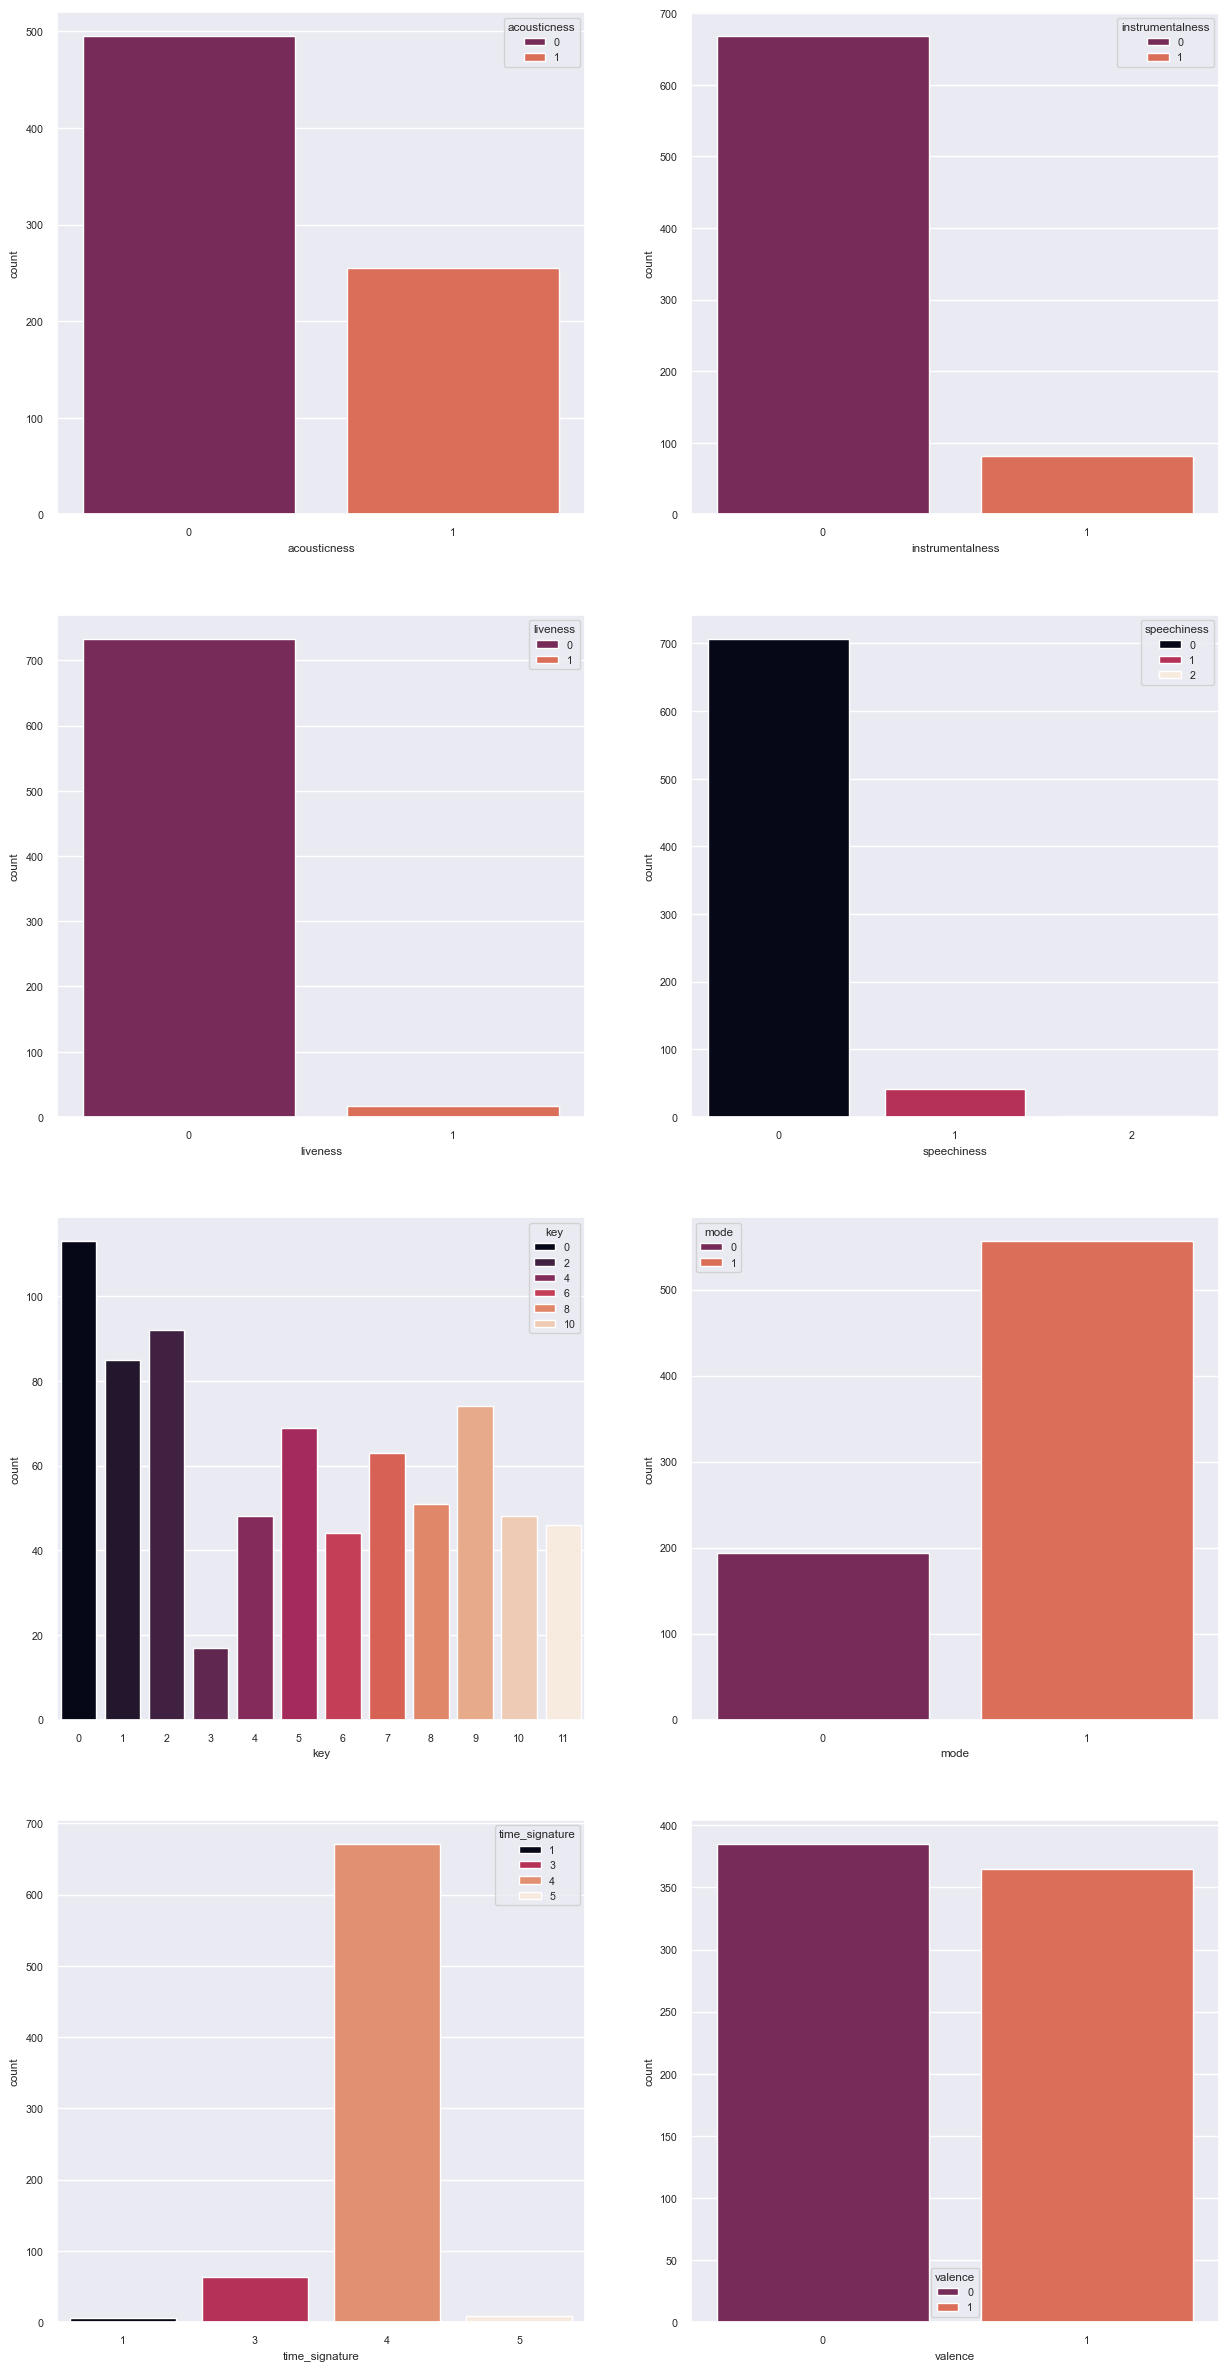

In [68]:
# Crear una figura con subplots
plt.figure(figsize=(15, 30))
for i, c in enumerate(CATEGORICAL_FEATURES, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=c, data=df_copia, palette="rocket", hue=c)

Con esta nueva categorización se hace más notables los sesgos presentes en algunas de las variables categoricas que se habían encontrado con la medida de simetria y la curtosis. 

In [69]:
df_copia_2 = df_copia.copy()
df_copia_2.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

# 3.- Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación
recomendaría? Ensayar distintas técnicas y analizar los resultados.

- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. **Nota**: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico.

- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?
Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de
entrada de mayor importancia? Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

Como nuestro dataset no posee datos faltantes vamos a insertar datos faltantes.

In [70]:
# Hacemos una copia del dataset
df_copia_3 = df.copy()

Vamos a agregar valores NaN en el dataframe original

In [71]:
df_copia_3.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [72]:
# Como no tengo valores nulos, voy a introducir valores nulos de forma aleatoria en el dataset para ver como se comporta el modelo
# pero quiero que no sean en todas las columnas sino algunas de forma aleatoria
import random
import math

# semilla
random.seed(42)

# Define el número de columnas que deseas seleccionar aleatoriamente
num_columnas_seleccionar = 3

# Selecciona aleatoriamente las columnas que se llenarán con valores nulos
columnas_a_introducir_nulos = random.sample(df_copia_3.columns.tolist(), num_columnas_seleccionar)

# Define el porcentaje máximo de valores nulos que deseas introducir en cada columna
porcentaje_nulos_maximo = 0.5  # Por ejemplo, un máximo del 50% de valores nulos

# Inicializa un diccionario para rastrear la cantidad de valores nulos por columna
nulos_por_columna = {}

# Itera sobre las columnas seleccionadas aleatoriamente
for columna in columnas_a_introducir_nulos:
    # Calcula el número de filas en la columna actual
    num_filas = df_copia_3.shape[0]
    
    # Calcula el porcentaje de valores nulos para esta columna de manera aleatoria
    porcentaje_nulos_columna = random.uniform(0, porcentaje_nulos_maximo)
    
    # Calcula cuántos valores nulos introducir en esta columna
    num_nulos_columna = int(porcentaje_nulos_columna * num_filas)
    
    # Genera índices aleatorios para las filas en esta columna
    filas_con_nulos_columna = np.random.choice(num_filas, num_nulos_columna, replace=True)
    
    # Establece los valores correspondientes en esas ubicaciones como NaN
    for fila in filas_con_nulos_columna:
        df_copia_3.at[fila, columna] = np.nan
    
    # Registra la cantidad de valores nulos introducidos en esta columna
    nulos_por_columna[columna] = num_nulos_columna

Vemos que se han agregado datos NaN a 3 columnas del dataset.

In [73]:
df_copia_3.isnull().sum()

acousticness         50
danceability         86
duration              0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo               225
time_signature        0
valence               0
label                 0
dtype: int64

In [74]:
df_copia_3.head()

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.713         0.514    100125   0.521          0.816000    8   
1         0.192         0.714    207019   0.614          0.000000    4   
2         0.333         0.630    216200   0.455          0.000004    5   
3         0.601         0.810    136413   0.221          0.210000    5   
4         0.883         0.465    181440   0.459          0.000173    6   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1120   -14.835     0       0.0444      NaN               4    0.143   
1    0.2630    -6.935     1       0.0319  123.969               4    0.582   
2    0.1270    -9.290     1       0.0292  139.931               4    0.199   
3    0.1840   -11.005     1       0.0429  109.960               4    0.798   
4    0.0692    -8.137     0       0.0351      NaN               4    0.288   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

Dado que nuestro Dataset originalmente no tenía nulos, los agregamos de forma aleatoria, por tanto estamos ante un caso de Missing Data Completely at Random (MCAR).

### Usaremos la tecnica de imputación estadística:

- Usaremos *SimpleImputer* de SKLearn para imputar por:
    - Promedio
    - Mediana
    - Moda
    - Constante
    
- Haremos la búsqueda de mejores parámetros por Grid Search.

In [75]:
# Veo las columnas que tienen valores nulos
df_copia_3.isnull().sum() 

acousticness         50
danceability         86
duration              0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo               225
time_signature        0
valence               0
label                 0
dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

#X = df_copia_3.values[:, :-1] # Todas las filas, todas las columnas menos la última
X = df_copia_3[['acousticness','danceability','tempo']].values[:, :-1]
y = df_copia_3.values[:, -1]


Búsqueda de mejores parámetros por Grid Search.

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ( 'imputer' ,SimpleImputer()), 
    ( 'lr' , LogisticRegression() )
])

param_grid = {
    "imputer__strategy": ['most_frequent', 'mean','constant','median' ],
    "lr__max_iter": [1000]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
search = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=cv)
results =search.fit(X,y)


In [79]:
print('Mejor Puntaje (Accuracy): %.3f ' % results.best_score_)
print('Mejor parámetro: %s ' % results.best_params_)

Mejor Puntaje (Accuracy): 0.715 
Mejor parámetro: {'imputer__strategy': 'median', 'lr__max_iter': 1000} 


In [80]:
pd.DataFrame(results.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002098      0.000128         0.000420        0.000023   
1       0.001984      0.000090         0.000411        0.000005   
2       0.001828      0.000137         0.000428        0.000005   
3       0.002164      0.000101         0.000413        0.000009   

  param_imputer__strategy param_lr__max_iter  \
0           most_frequent               1000   
1                    mean               1000   
2                constant               1000   
3                  median               1000   

                                              params  split0_test_score  \
0  {'imputer__strategy': 'most_frequent', 'lr__ma...           0.746667   
1  {'imputer__strategy': 'mean', 'lr__max_iter': ...           0.720000   
2  {'imputer__strategy': 'constant', 'lr__max_ite...           0.706667   
3  {'imputer__strategy': 'median', 'lr__max_iter'...           0.693333   

   split1_test_score  split2_test_score  ...  split18_test_score  \
0           0.673333           0.686667  ...            0.653333   
1           0.666667           0.693333  ...            0.653333   
2           0.700000           0.693333  ...            0.600000   
3           0.673333           0.713333  ...            0.646667   

   split19_test_score  split20_test_score  split21_test_score  \
0            0.700000            0.706667            0.753333   
1            0.700000            0.693333            0.720000   
2            0.706667            0.713333            0.726667   
3            0.713333            0.700000            0.746667   

   split22_test_score  split23_test_score  split24_test_score  \
0            0.713333            0.713333            0.713333   
1            0.726667            0.726667            0.693333   
2            0.693333            0.720000            0.653333   
3            0.713333            0.726667            0.693333   

   mean_test_score  std_test_score  rank_test_score  
0         0.712800        0.035474                2  
1         0.712800        0.030283                3  
2         0.699733        0.031860                4  
3         0.714667        0.034820                1  

[4 rows x 35 columns]

Comparación de resultados por K-Folds.

In [81]:
from sklearn.model_selection import cross_val_score

results=[]
for param in param_grid["imputer__strategy"]:
    pipeline = Pipeline(steps=[
        ( 'imputer' ,SimpleImputer(strategy=param)), 
        ( 'lr' , LogisticRegression(max_iter=1000) )
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)

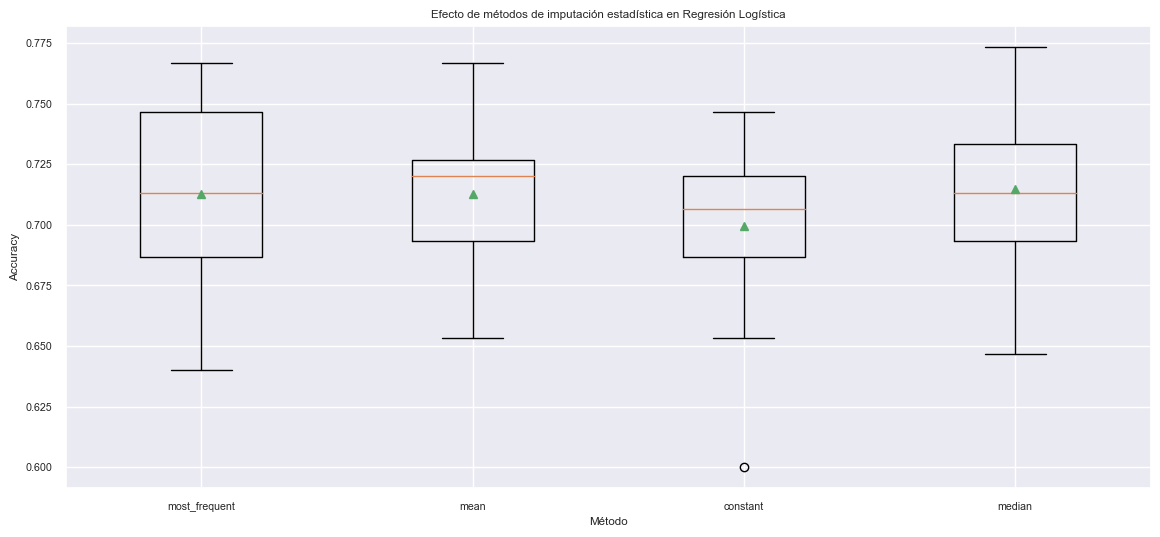

In [82]:
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["imputer__strategy"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto de métodos de imputación estadística en Regresión Logística");

# Discretización de variables continuas 

In [83]:
df_copia_2

acousticness  danceability  duration  energy  instrumentalness  key  \
0               1         0.514    100125   0.521                 1    8   
1               0         0.714    207019   0.614                 0    4   
2               0         0.630    216200   0.455                 0    5   
3               1         0.810    136413   0.221                 0    5   
4               1         0.465    181440   0.459                 0    6   
..            ...           ...       ...     ...               ...  ...   
745             0         0.374    333827   0.943                 0    6   
746             0         0.487    213000   0.867                 0   10   
747             1         0.605    125867   0.314                 0    0   
748             0         0.700    249493   0.823                 0    3   
749             0         0.477    276720   0.776                 0    1   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0           0   -14.835     0            0  119.879               4        0   
1           0    -6.935     1            0  123.969               4        1   
2           0    -9.290     1            0  139.931               4        0   
3           0   -11.005     1            0  109.960               4        1   
4           0    -8.137     0            0   90.807               4        0   
..        ...       ...   ...          ...      ...             ...      ...   
745         0    -4.108     0            0  112.084               4        0   
746         0    -3.293     0            0  160.048               4        0   
747         0    -7.631     1            0  138.148               4        1   
748         0    -6.892     1            0  144.060               4        1   
749         0    -5.056     1            0  131.004               4        0   

     label  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
745      0  
746      0  
747      1  
748      1  
749      1  

[750 rows x 14 columns]

Las variables continuas que se van a discretizar (o binear) son danceability y energery : 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    df_copia_2[['danceability', 'energy']],
    df_copia_2['label'],
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((525, 2), (225, 2))

Vamos a probar con KBinsDiscretizer con tres estrategias diferentes : 

/home/jorge/especializacion-uba/cursada/tp_final_analisis_datos/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/jorge/especializacion-uba/cursada/tp_final_analisis_datos/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


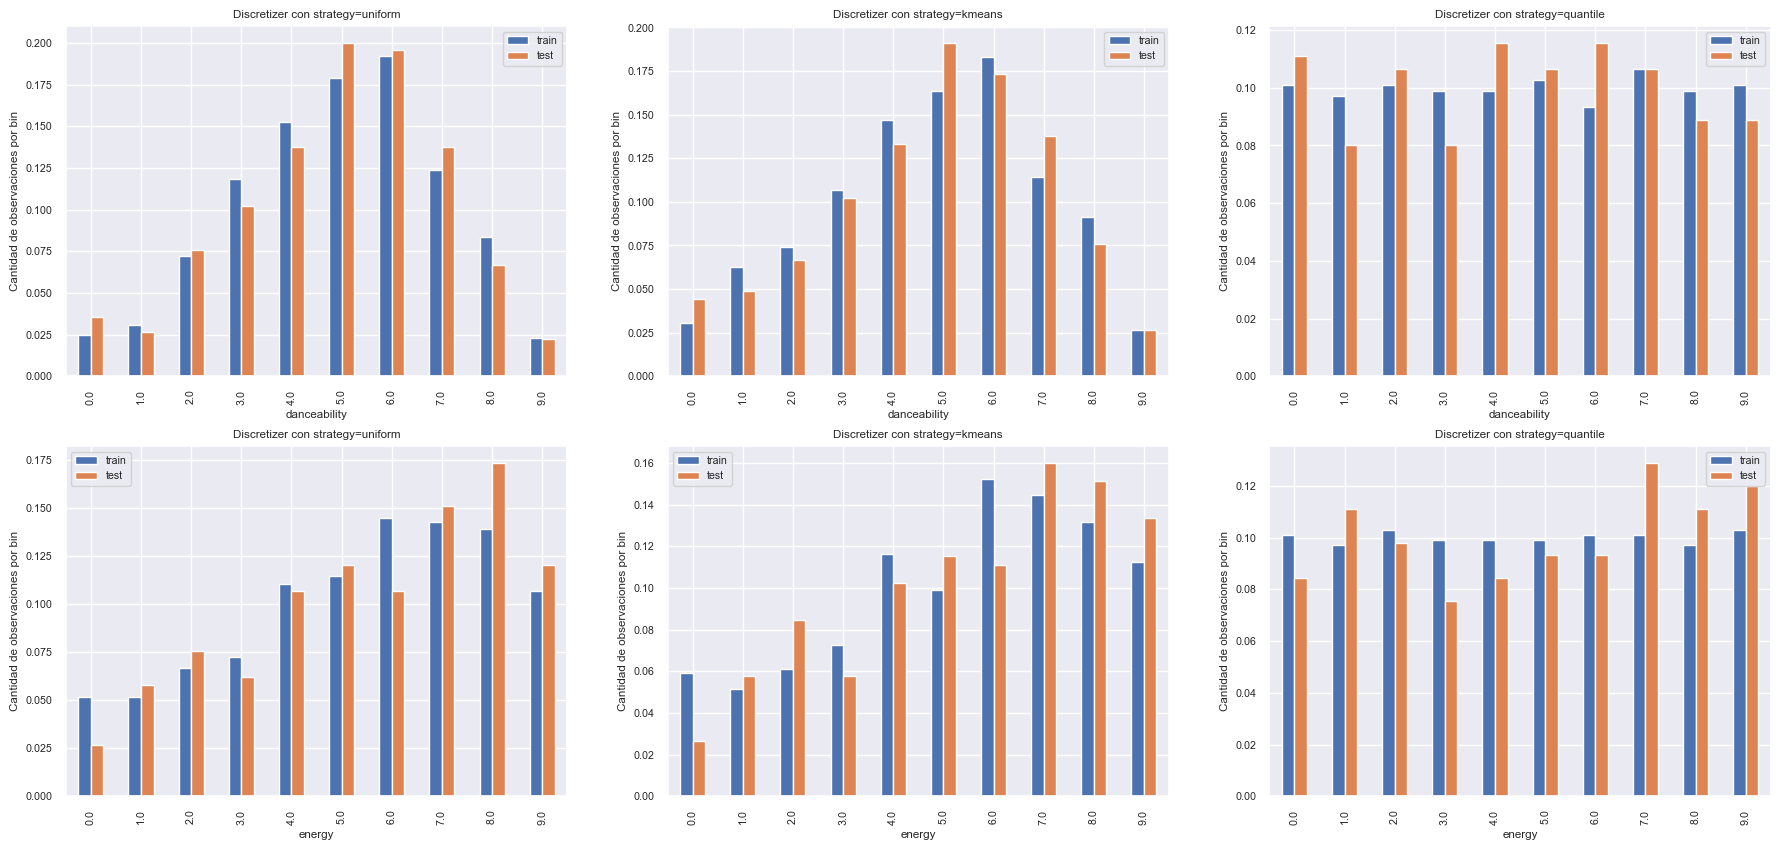

In [85]:
from sklearn.preprocessing import KBinsDiscretizer

discretizers = [
    ("uniform", KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')),    
    ("kmeans", KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')),
    ("quantile", KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile'))
]
     
fig,axes=plt.subplots(2,len(discretizers),figsize=(22,10))

for i,d in enumerate(discretizers):
    name,disc = d[0],d[1]
    disc.fit(X_train[['danceability', 'energy']])
    #disc.bin_edges_
    
    train_t = disc.transform(X_train[['danceability', 'energy']])
    train_t = pd.DataFrame(train_t, columns = ['danceability', 'energy'])
    train_t.head()
    
    test_t = disc.transform(X_test[['danceability', 'energy']])
    test_t = pd.DataFrame(test_t, columns = ['danceability', 'energy'])
     
    t1 = train_t.groupby(['danceability'])['danceability'].count() / len(train_t)
    t2 = test_t.groupby(['danceability'])['danceability'].count() / len(test_t)

    t3 = train_t.groupby(['energy'])['energy'].count() / len(train_t)
    t4 = test_t.groupby(['energy'])['energy'].count() / len(test_t)
     
     
    tmp = pd.concat([t1, t2], axis=1)
    tmp_2 = pd.concat([t3, t4], axis=1)
    tmp.columns = ['train', 'test']
    tmp_2.columns = ['train', 'test']
    tmp.plot.bar(ax=axes[0][i])
    tmp_2.plot.bar(ax=axes[1][i])
    axes[0][i].set_title("Discretizer con strategy={}".format(name));
    axes[0][i].set_ylabel('Cantidad de observaciones por bin');
    axes[1][i].set_title("Discretizer con strategy={}".format(name));
    axes[1][i].set_ylabel('Cantidad de observaciones por bin');

In [86]:
t1

danceability
0.0    0.100952
1.0    0.097143
2.0    0.100952
3.0    0.099048
4.0    0.099048
5.0    0.102857
6.0    0.093333
7.0    0.106667
8.0    0.099048
9.0    0.100952
Name: danceability, dtype: float64

In [87]:
t2

danceability
0.0    0.111111
1.0    0.080000
2.0    0.106667
3.0    0.080000
4.0    0.115556
5.0    0.106667
6.0    0.115556
7.0    0.106667
8.0    0.088889
9.0    0.088889
Name: danceability, dtype: float64

In [88]:
t3

energy
0.0    0.100952
1.0    0.097143
2.0    0.102857
3.0    0.099048
4.0    0.099048
5.0    0.099048
6.0    0.100952
7.0    0.100952
8.0    0.097143
9.0    0.102857
Name: energy, dtype: float64